# **Problem Statement**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue as of Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities. The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

Objective of analysis is:
- Clean, sanitize and manipulate data to get useful features out of raw fields
- Make sense out of the raw data and help the data science team to build forecasting models on it

**Column Profiling:**
- data - tells whether the data is testing or training data
- trip_creation_time – Timestamp of trip creation
- route_schedule_uuid – Unique Id for a particular route schedule
- route_type – Transportation type
- FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
- Carting: Handling system consisting of small vehicles (carts)
- trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
- source_center - Source ID of trip origin
- source_name - Source Name of trip origin
- destination_cente – Destination ID
- destination_name – Destination Name
- od_start_time – Trip start time
- od_end_time – Trip end time
- start_scan_to_end_scan – Time taken to deliver from source to destination
- is_cutoff – Unknown field
- cutoff_factor – Unknown field
- cutoff_timestamp – Unknown field
- actual_distance_to_destination – Distance in Kms between source and destination warehouse
- actual_time – Actual time taken to complete the delivery (Cumulative)
- osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- factor – Unknown field
- segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
- segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
- segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
- segment_factor – Unknown field

# **Loading dependencies and dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import f_oneway, kruskal
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_csv('./data/delhivery_data.txt')
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


# **Initial Observations**

## **Shape**

In [3]:
df.shape

(144867, 24)

## **Datatypes of the columns**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

## **Changing the data-type of the date columns from object to datetime:**

In [5]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

## **Missing values**
- We see that we have some missing values in 2 columnns --> source_name & destination_name
- However we will handle them once we condense the data at the required granular level

In [7]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

# **Condensing the data**

## **Groupby the data at the trip_id, source_center & destination_center level**
- source name, destiination name, route_type, trip_creation_time, od_start_time, od_end_time, start_scan_to_end_scan:
    - All these column values repeat for the entire group of rows and hence we choose the FIRST value
- actual_time, osrm_time, actual_distance_to_destination, osrm_distance:
    - The values in these columns are running/cumulative values and hence only the LAST value per group is of our interest
- segment_actual_time, segment_osrm_time, segment_osrm_distance:
    - The values in these columns need aggregation --> hence we use a sum aggregation for the rows in each group

In [8]:
df_trip_src_des = df.groupby(['trip_uuid', 
                              'source_center', 
                              'destination_center'])[['source_name', 'destination_name', 
                                                      'route_type', 'trip_creation_time', 
                                                      'od_start_time', 'od_end_time', 'start_scan_to_end_scan', 
                                                      'actual_time', 'osrm_time', 
                                                      'segment_actual_time', 'segment_osrm_time',
                                                      'actual_distance_to_destination', 'osrm_distance', 
                                                      'segment_osrm_distance']].agg({'source_name':'first', 'destination_name':'first', 
                                                                                     'route_type': 'first', 'trip_creation_time':'first', 
                                                                                     'od_start_time':'first', 'od_end_time':'first', 'start_scan_to_end_scan':'first',
                                                                                     'actual_time':'last', 'osrm_time':'last',
                                                                                     'segment_actual_time':'sum', 'segment_osrm_time':'sum', 
                                                                                     'actual_distance_to_destination':'last', 'osrm_distance':'last',
                                                                                     'segment_osrm_distance':'sum'}).reset_index()
df_trip_src_des.sort_values(by=['trip_uuid', 'od_start_time'], ascending=[True, True], inplace=True)
df_trip_src_des.head()

,trip_uuid,source_center,destination_center,source_name,destination_name,route_type,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance
1,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,830.0,388.0,820.0,474.0,440.973689,544.8027,649.8528
0,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,732.0,329.0,728.0,534.0,383.759164,446.5496,670.6205
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,96.0,42.0,95.0,39.0,48.542890,56.9116,55.9899
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,47.0,26.0,46.0,26.0,24.644021,28.1994,28.1995
5,trip-153671043369099517,IND562132AAA,IND000000ACB,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-12 00:00:33.691250,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,2736.0,1528.0,2700.0,1710.0,1689.964663,2072.8556,2227.5270


## **We have condensed the data from ~145k rows to ~26.5k rows**

In [9]:
df_trip_src_des.shape

(26368, 17)

In [10]:
# df_trip_src_des.loc[df_trip_src_des['trip_uuid'] == 'trip-153671041653548748']

In [11]:
# df_trip_src_des.loc[df_trip_src_des['trip_uuid'] == 'trip-153741093647649320']

In [12]:
# df_trip_src_des.loc[(df_trip_src_des['destination_name'] == 'Gurgaon_Bilaspur_HB (Haryana)') & (df_trip_src_des['trip_uuid'] == 'trip-153671041653548748')]

## **Groupby the data at the trip_id level**
- source_center, destination_center, source name, destiination name, od_start_time, od_end_time:
    - For source center, source name & od_start_time,  we want the FIRST value (source name and start time @ origin of the package)
    - For destination center, destination name & od_end_time, we want the LAST value (destination name and end time @ last stop of the package)
- route_type, trip_creation_time:
    - All these column values repeat for the entire group of rows and hence we choose the FIRST value
- start_scan_to_end_scan, actual_time, osrm_time, actual_distance_to_destination, osrm_distance, segment_actual_time, segment_osrm_time, segment_osrm_distance:
    - The values in these columns need aggregation --> hence we use a sum aggregation for the rows in each group

In [13]:
df_trip = df_trip_src_des.groupby(['trip_uuid'])[['source_center', 'destination_center', 
                                                  'source_name','destination_name',
                                                  'route_type', 'trip_creation_time', 
                                                  'od_start_time', 'od_end_time', 'start_scan_to_end_scan', 
                                                  'actual_time', 'osrm_time', 
                                                  'segment_actual_time', 'segment_osrm_time', 
                                                  'actual_distance_to_destination', 'osrm_distance', 
                                                  'segment_osrm_distance']].agg({'source_center':'first', 'destination_center':'last',
                                                                                 'source_name':'first', 'destination_name':['last', 'count'], 
                                                                                 'route_type': 'first', 'trip_creation_time':'first', 
                                                                                 'od_start_time':'first', 'od_end_time':'last', 'start_scan_to_end_scan':'sum',
                                                                                 'actual_time':'sum', 'osrm_time':'sum',
                                                                                 'segment_actual_time':'sum', 'segment_osrm_time':'sum', 
                                                                                 'actual_distance_to_destination':'sum', 'osrm_distance':'sum', 
                                                                                 'segment_osrm_distance':'sum'}).reset_index()


df_trip.columns = [col[0] if col[1]!='count' else 'stops' for col in df_trip.columns]
df_trip.head()

,trip_uuid,source_center,destination_center,source_name,destination_name,stops,route_type,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance
0,trip-153671041653548748,IND462022AAA,IND000000ACB,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2,FTL,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,1562.0,717.0,1548.0,1008.0,824.732854,991.3523,1320.4733
1,trip-153671042288605164,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2,Carting,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,143.0,68.0,141.0,65.0,73.186911,85.1110,84.1894
2,trip-153671043369099517,IND562132AAA,IND160002AAC,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2,FTL,2018-09-12 00:00:33.691250,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,3347.0,1740.0,3308.0,1941.0,1927.404273,2354.0665,2545.2678
3,trip-153671046011330457,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),1,Carting,2018-09-12 00:01:00.113710,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,59.0,15.0,59.0,16.0,17.175274,19.6800,19.8766
4,trip-153671052974046625,IND583101AAA,IND583101AAA,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),3,FTL,2018-09-12 00:02:09.740725,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,341.0,117.0,340.0,115.0,127.448500,146.7918,146.7919


## **We have condensed the data from ~26.5k rows to ~15k rows**

In [14]:
df_trip.shape

(14817, 18)

# **Dealing with missing values**

In [15]:
df_trip.isna().sum()

trip_uuid                          0
source_center                      0
destination_center                 0
source_name                       10
destination_name                   8
stops                              0
route_type                         0
trip_creation_time                 0
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
actual_time                        0
osrm_time                          0
segment_actual_time                0
segment_osrm_time                  0
actual_distance_to_destination     0
osrm_distance                      0
segment_osrm_distance              0
dtype: int64

## **Identifying faulty data**
- Each source center should point to a unique source name
- Each destination center should point to a unique destination name
- We try to identify any such source/destination centers which points to more than 1 source/destination names respectively

In [16]:
x = df_trip.groupby('source_center')['source_name'].agg(['count', 'nunique'])
faultly_centers1 = x.loc[x['nunique']>1]
faultly_centers1

,count,nunique
source_center,,
IND282002AAD,8,2


In [17]:
y = df_trip.groupby('destination_center')['destination_name'].agg(['count', 'nunique'])
faultly_centers2 = y.loc[y['nunique']>1]
faultly_centers2

,count,nunique
destination_center,,
IND282002AAD,18,3


- Clearly there is something wrong with the source/destination center: 'IND282002AAD'
- We plan to drop all such rows where the above center is a source or destination

In [18]:
rows_to_drop = df_trip.loc[df_trip['source_center'].isin(faultly_centers1.index) | df_trip['destination_center'].isin(faultly_centers2.index)].index
df_trip.drop(rows_to_drop, axis=0, inplace=True)
df_trip.shape

(14785, 18)

In [19]:
df_trip.isna().sum()

trip_uuid                         0
source_center                     0
destination_center                0
source_name                       2
destination_name                  7
stops                             0
route_type                        0
trip_creation_time                0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_time                       0
osrm_time                         0
segment_actual_time               0
segment_osrm_time                 0
actual_distance_to_destination    0
osrm_distance                     0
segment_osrm_distance             0
dtype: int64

## **Locating all the source/destination centers with unknown names:**

In [20]:
unknown_source_centers = set(df_trip.loc[(df_trip['source_name'].isna()), 'source_center'].unique())
print('Unknown source centers:', unknown_source_centers)
print('-'*100)
unknown_dest_centers = set(df_trip.loc[(df_trip['destination_name'].isna()), 'destination_center'].unique())
print('Unknown destination centers:', unknown_dest_centers)

Unknown source centers: {'IND577116AAA', 'IND331022A1B'}
----------------------------------------------------------------------------------------------------
Unknown destination centers: {'IND505326AAB', 'IND122015AAC', 'IND250002AAC', 'IND331001A1C'}


## **Trying to locate if:**
- The unknown destination centers show up as source centers and whether the source name is present or not
- The unknown source centers show up as destination centers and whether the destination name is present or not

In [21]:
df_trip.loc[df_trip['source_center'].isin(unknown_dest_centers)]

,trip_uuid,source_center,destination_center,source_name,destination_name,stops,route_type,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance


In [22]:
df_trip.loc[df_trip['destination_center'].isin(unknown_source_centers)]

,trip_uuid,source_center,destination_center,source_name,destination_name,stops,route_type,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance
7844,trip-153764981783105349,IND573201AAB,IND577116AAA,Hassan_Pandrnga_I (Karnataka),Sakleshpur_RgvdrDPP_D (Karnataka),1,FTL,2018-09-22 20:56:57.831429,2018-09-22 20:56:57.831429,2018-09-23 02:35:15.355388,160.0,129.0,78.0,128.0,76.0,71.778871,92.4754,92.4754


In [23]:
df_trip.loc[df_trip['source_center'] == 'IND577116AAA', 'source_name'] = 'Sakleshpur_RgvdrDPP_D (Karnataka)'

In [24]:
df_trip.isna().sum()

trip_uuid                         0
source_center                     0
destination_center                0
source_name                       1
destination_name                  7
stops                             0
route_type                        0
trip_creation_time                0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_time                       0
osrm_time                         0
segment_actual_time               0
segment_osrm_time                 0
actual_distance_to_destination    0
osrm_distance                     0
segment_osrm_distance             0
dtype: int64

## **Dropping the trips where we could not find source name or destination name or both**
- We have data for arounf ~15k trips and 
- There are only 7 trips for which we have missing data  as shown below
- Thus we go ahead and drop them

In [25]:
df_trip.loc[(df_trip['source_name'].isna()) | (df_trip['destination_name'].isna())]

,trip_uuid,source_center,destination_center,source_name,destination_name,stops,route_type,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance
5289,trip-153733592611290696,IND000000ACB,IND122015AAC,Gurgaon_Bilaspur_HB (Haryana),None,0,Carting,2018-09-19 05:45:26.113345,2018-09-19 05:45:26.113345,2018-09-19 09:11:40.486648,206.0,73.0,34.0,72.0,36.0,30.407059,35.3948,39.4788
5778,trip-153739792417979729,IND504215AAA,IND505326AAB,Luxettipet_ShivaDPP_D (Telangana),None,0,FTL,2018-09-19 22:58:44.180028,2018-09-20 06:17:36.456909,2018-09-20 09:15:28.704827,177.0,157.0,58.0,156.0,58.0,51.604090,64.6296,64.6296
5961,trip-153741501937042684,IND000000ACB,IND122015AAC,Gurgaon_Bilaspur_HB (Haryana),None,0,Carting,2018-09-20 03:43:39.370661,2018-09-20 03:43:39.370661,2018-09-20 08:28:34.545131,284.0,96.0,35.0,95.0,33.0,29.227677,35.5767,35.5767
10562,trip-153800051661903546,IND331022A1B,IND331001A1C,None,None,0,FTL,2018-09-26 22:21:56.619259,2018-09-27 03:19:14.797080,2018-09-27 05:28:00.922915,128.0,128.0,49.0,127.0,48.0,50.844665,60.9205,60.9205
13313,trip-153839879406683648,IND131028AAB,IND250002AAC,Sonipat_Kundli_H (Haryana),None,0,FTL,2018-10-01 12:59:54.067059,2018-10-01 12:59:54.067059,2018-10-02 00:18:03.353488,678.0,405.0,72.0,405.0,72.0,54.120325,89.7878,89.7878
13408,trip-153841850974526339,IND110037AAM,IND250002AAC,Delhi_Airport_H (Delhi),None,0,FTL,2018-10-01 18:28:29.745506,2018-10-01 18:28:29.745506,2018-10-03 19:00:09.533421,2911.0,1496.0,92.0,1495.0,131.0,70.627876,88.6467,121.2165
14453,trip-153857174991144707,IND110037AAM,IND250002AAC,Delhi_Airport_H (Delhi),None,0,FTL,2018-10-03 13:02:29.911693,2018-10-03 13:02:29.911693,2018-10-03 19:47:17.103230,404.0,114.0,96.0,112.0,98.0,69.948877,91.8598,91.8108


In [26]:
rows_to_drop = df_trip.loc[(df_trip['source_name'].isna()) | (df_trip['destination_name'].isna())].index
df_trip.drop(rows_to_drop, axis=0, inplace=True)
df_trip.shape

(14778, 18)

In [27]:
df_trip.isna().sum()

trip_uuid                         0
source_center                     0
destination_center                0
source_name                       0
destination_name                  0
stops                             0
route_type                        0
trip_creation_time                0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_time                       0
osrm_time                         0
segment_actual_time               0
segment_osrm_time                 0
actual_distance_to_destination    0
osrm_distance                     0
segment_osrm_distance             0
dtype: int64

# **Feature Creation**
- We have already created the number of stops for each trip earlier --> column name: 'stops'
    - For example: If a package travels directly from origin to final destination; then stops = 1
    - If a package has 1 intermediate stop b/w origin & final destination; then stops = 2 and so on
- source name --> State, City, Place 
- destination name --> State, City, Place 
- trip_creation_time --> Year, Month, Day

In [28]:
df_trip.head(10)

,trip_uuid,source_center,destination_center,source_name,destination_name,stops,route_type,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance
0,trip-153671041653548748,IND462022AAA,IND000000ACB,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2,FTL,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,1562.0,717.0,1548.0,1008.0,824.732854,991.3523,1320.4733
1,trip-153671042288605164,IND572101AAA,IND562101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2,Carting,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,143.0,68.0,141.0,65.0,73.186911,85.1110,84.1894
2,trip-153671043369099517,IND562132AAA,IND160002AAC,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2,FTL,2018-09-12 00:00:33.691250,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,3347.0,1740.0,3308.0,1941.0,1927.404273,2354.0665,2545.2678
3,trip-153671046011330457,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),1,Carting,2018-09-12 00:01:00.113710,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,59.0,15.0,59.0,16.0,17.175274,19.6800,19.8766
4,trip-153671052974046625,IND583101AAA,IND583101AAA,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),3,FTL,2018-09-12 00:02:09.740725,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,341.0,117.0,340.0,115.0,127.448500,146.7918,146.7919
5,trip-153671055416136166,IND600116AAB,IND602105AAB,Chennai_Porur_DPC (Tamil Nadu),Chennai_Sriperumbudur_Dc (Tamil Nadu),2,Carting,2018-09-12 00:02:34.161600,2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,189.0,61.0,23.0,60.0,23.0,24.597048,28.0647,28.0647
6,trip-153671066201138152,IND600044AAD,IND600048AAA,Chennai_Chrompet_DPC (Tamil Nadu),Chennai_Vandalur_Dc (Tamil Nadu),1,Carting,2018-09-12 00:04:22.011653,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,98.0,24.0,13.0,24.0,13.0,9.100510,12.0184,12.0184
7,trip-153671066826362165,IND560043AAC,IND560043AAC,HBR Layout PC (Karnataka),HBR Layout PC (Karnataka),2,Carting,2018-09-12 00:04:28.263977,2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,146.0,64.0,34.0,64.0,34.0,22.424210,28.9203,28.9203
8,trip-153671074033284934,IND395023AAD,IND395023AAD,Surat_Central_I_4 (Gujarat),Surat_Central_I_4 (Gujarat),2,Carting,2018-09-12 00:05:40.333071,2018-09-12 00:05:40.333071,2018-09-12 05:16:28.581141,280.0,161.0,29.0,161.0,29.0,25.454848,30.9359,30.9358
9,trip-153671079956500691,IND110024AAA,IND110014AAA,Delhi_Lajpat_IP (Delhi),Delhi_Bhogal (Delhi),1,Carting,2018-09-12 00:06:39.565253,2018-09-12 00:06:39.565253,2018-09-12 00:55:59.568645,49.0,23.0,8.0,23.0,14.0,9.872146,9.9566,16.0860


In [29]:
df_trip['s_state'] = df_trip['source_name'].apply(lambda x: x.split('(')[-1][:-1].strip())
df_trip['s_city'] = df_trip['source_name'].apply(lambda x: x.split('(')[0].split('_')[0].strip())

In [30]:
df_trip['d_state'] = df_trip['destination_name'].apply(lambda x: x.split('(')[-1][:-1].strip())
df_trip['d_city'] = df_trip['destination_name'].apply(lambda x: x.split('(')[0].split('_')[0].strip())

In [31]:
def place_extract(s):
    s_lst = s.split('(')[0].split('_')
    if len(s_lst) == 1:
        return 'NA'
    elif len(s_lst) == 2:
        if len(s_lst[1].strip()) <= 3:
            return s_lst[1].upper().strip()
        else:
            return ('-').join(s_lst[1].split())
    elif len(s_lst) == 3:
        if len(s_lst[1].strip()) <= 4:
            place_1 = s_lst[1].upper().strip()
        else:
            place_1 = s_lst[1].strip()   
        return place_1 + '-' + s_lst[2].upper().strip()
    
    place_1 = s_lst[1].strip()
    place_2 =  s_lst[2].strip()
    place_3 =  s_lst[3].strip()
    return place_1+'-'+place_2+place_3


df_trip['s_place'] = df_trip['source_name'].apply(place_extract)
df_trip['d_place'] = df_trip['destination_name'].apply(place_extract)

In [32]:
df_trip['trip_creation_year'] = df_trip['trip_creation_time'].dt.year
df_trip['trip_creation_month'] = df_trip['trip_creation_time'].dt.month
df_trip['trip_creation_day'] = df_trip['trip_creation_time'].dt.day

## **Final Touches**

In [33]:
df_trip.loc[df_trip['s_city']=='Bengaluru', 's_city'] = 'Bangalore'
df_trip.loc[df_trip['d_city']=='Bengaluru', 'd_city'] = 'Bangalore'

## **Final dataset**

In [34]:
# df_trip.columns

In [35]:
df_final = df_trip[['trip_uuid', 'trip_creation_year', 'trip_creation_month', 'trip_creation_day', 
                    's_state', 's_city', 'd_state', 'd_city', 's_place', 'd_place', 'stops', 
                    'route_type', 'od_start_time', 'od_end_time', 'start_scan_to_end_scan', 
                    'actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time', 
                    'actual_distance_to_destination', 'osrm_distance', 'segment_osrm_distance']].copy()
df_final.reset_index(inplace=True, drop=True)

In [36]:
df_final

,trip_uuid,trip_creation_year,trip_creation_month,trip_creation_day,s_state,s_city,d_state,d_city,s_place,d_place,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance
0,trip-153671041653548748,2018,9,12,Madhya Pradesh,Bhopal,Haryana,Gurgaon,Trnsport-H,Bilaspur-HB,...,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,1562.0,717.0,1548.0,1008.0,824.732854,991.3523,1320.4733
1,trip-153671042288605164,2018,9,12,Karnataka,Tumkur,Karnataka,Chikblapur,Veersagr-I,ShntiSgr-D,...,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,143.0,68.0,141.0,65.0,73.186911,85.1110,84.1894
2,trip-153671043369099517,2018,9,12,Karnataka,Bangalore,Punjab,Chandigarh,Nelmngla-H,Mehmdpur-H,...,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,3347.0,1740.0,3308.0,1941.0,1927.404273,2354.0665,2545.2678
3,trip-153671046011330457,2018,9,12,Maharashtra,Mumbai Hub,Maharashtra,Mumbai,NA,MiraRd-IP,...,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,59.0,15.0,59.0,16.0,17.175274,19.6800,19.8766
4,trip-153671052974046625,2018,9,12,Karnataka,Bellary,Karnataka,Bellary,DC,DC,...,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,341.0,117.0,340.0,115.0,127.448500,146.7918,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14773,trip-153861095625827784,2018,10,3,Punjab,Chandigarh,Punjab,Chandigarh,Mehmdpur-H,Mehmdpur-H,...,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,83.0,62.0,82.0,62.0,57.762332,73.4630,64.8551
14774,trip-153861104386292051,2018,10,3,Haryana,FBD,Haryana,Faridabad,Balabhgarh-DPC,Blbgarh-DC,...,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,21.0,12.0,21.0,11.0,15.513784,16.0882,16.0883
14775,trip-153861106442901555,2018,10,3,Uttar Pradesh,Kanpur,Uttar Pradesh,Kanpur,Central-H6,Central-H6,...,2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,421.0,282.0,48.0,281.0,88.0,38.684839,58.9037,104.8866
14776,trip-153861115439069069,2018,10,3,Tamil Nadu,Tirunelveli,Tamil Nadu,Tirunelveli,VdkkuSrt-I,VdkkuSrt-I,...,2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,347.0,264.0,179.0,258.0,221.0,134.723836,171.1103,223.5324


# **Hypothesis Tests**

## **Difference b/w od_end_time & od_start_time**

In [37]:
df_final['trip_total_time'] = (df_final['od_end_time'] - df_final['od_start_time'])/pd.Timedelta(minutes=1)
df_final['trip_total_time']

0        2260.109800
1         181.611874
2        3934.362520
3         100.494935
4         718.349042
            ...     
14773     405.485842
14774      60.590521
14775     422.119867
14776     348.512862
14777     354.407571
Name: trip_total_time, Length: 14778, dtype: float64

## **Compare the difference between trip_total_time and start_scan_to_end_scan.**

In [38]:
df_final[['trip_total_time', 'start_scan_to_end_scan']]

,trip_total_time,start_scan_to_end_scan
0,2260.109800,2259.0
1,181.611874,180.0
2,3934.362520,3933.0
3,100.494935,100.0
4,718.349042,717.0
...,...,...
14773,405.485842,257.0
14774,60.590521,60.0
14775,422.119867,421.0
14776,348.512862,347.0


In [39]:
df_final[['trip_total_time', 'start_scan_to_end_scan']].describe()

,trip_total_time,start_scan_to_end_scan
count,14778.000000,14778.000000
mean,547.580485,530.903776
std,669.158573,659.193963
min,23.461468,23.000000
25%,150.964456,149.000000
50%,288.241140,279.000000
75%,673.867606,638.000000
max,7898.551955,7898.000000


In [40]:
diff_1 = (df_final['trip_total_time']-df_final['start_scan_to_end_scan'])
diff_1_filtered = diff_1.loc[diff_1<1000]

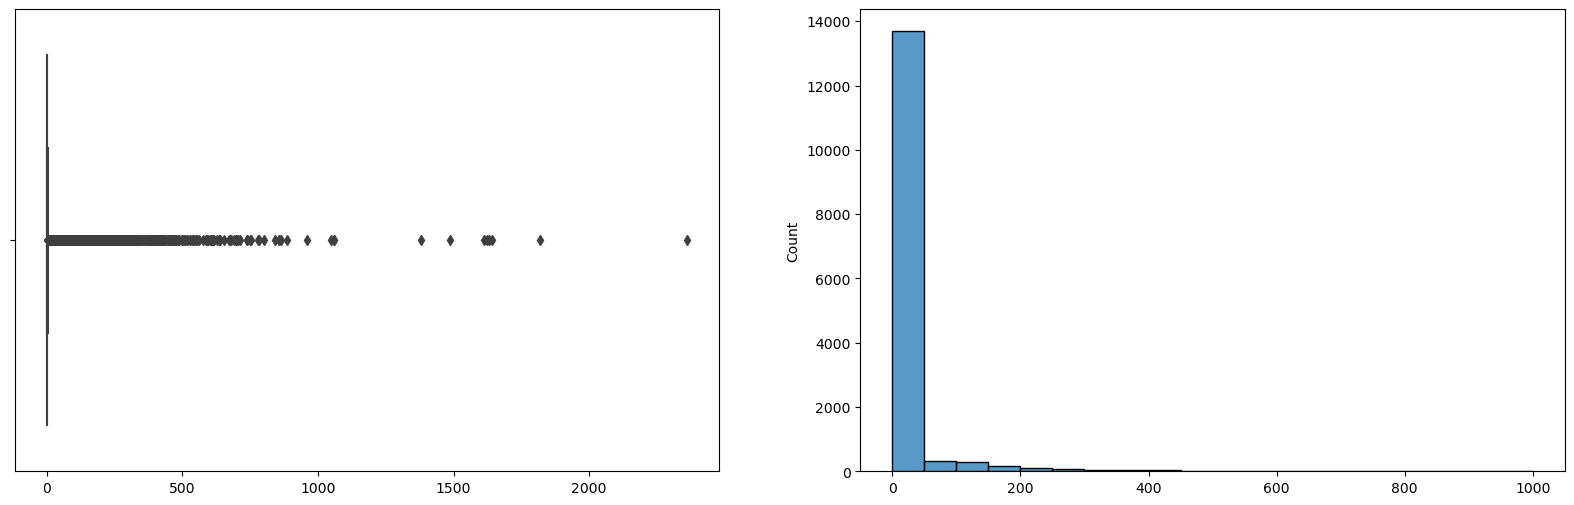

In [41]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=diff_1.values)
plt.subplot(1, 2, 2)
sns.histplot(x=diff_1_filtered.values, binwidth=50)
plt.show()

**Null and Alternate hypothesis:**
- H0: u_total_trip_time = u_start_scan_to_end_scan
- Ha: u_total_trip_time > u_start_scan_to_end_scan

In [42]:
t_stat, p_value=ttest_rel(df_final['trip_total_time'], df_final['start_scan_to_end_scan'], alternative='greater')
print('p_value:', p_value, 't_stat:', t_stat)
if p_value<0.05:
    print('Reject H0')
else:
    print('Fail to Reject H0')

p_value: 1.6104839185585e-154 t_stat: 26.771511487181606
Reject H0


## **Actual Time (Aggregated) vs OSRM Time (Aggregated)**

In [43]:
df_final[['actual_time', 'osrm_time']]

,actual_time,osrm_time
0,1562.0,717.0
1,143.0,68.0
2,3347.0,1740.0
3,59.0,15.0
4,341.0,117.0
...,...,...
14773,83.0,62.0
14774,21.0,12.0
14775,282.0,48.0
14776,264.0,179.0


In [44]:
df_final[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,14778.000000,14778.000000
mean,357.255312,161.461700
std,562.004628,271.698104
min,9.000000,6.000000
25%,67.000000,29.000000
50%,148.500000,60.000000
75%,369.750000,168.000000
max,6265.000000,2032.000000


In [45]:
diff_2 = (df_final['actual_time']-df_final['osrm_time'])
diff_2_filtered = diff_2.loc[diff_2<3000]

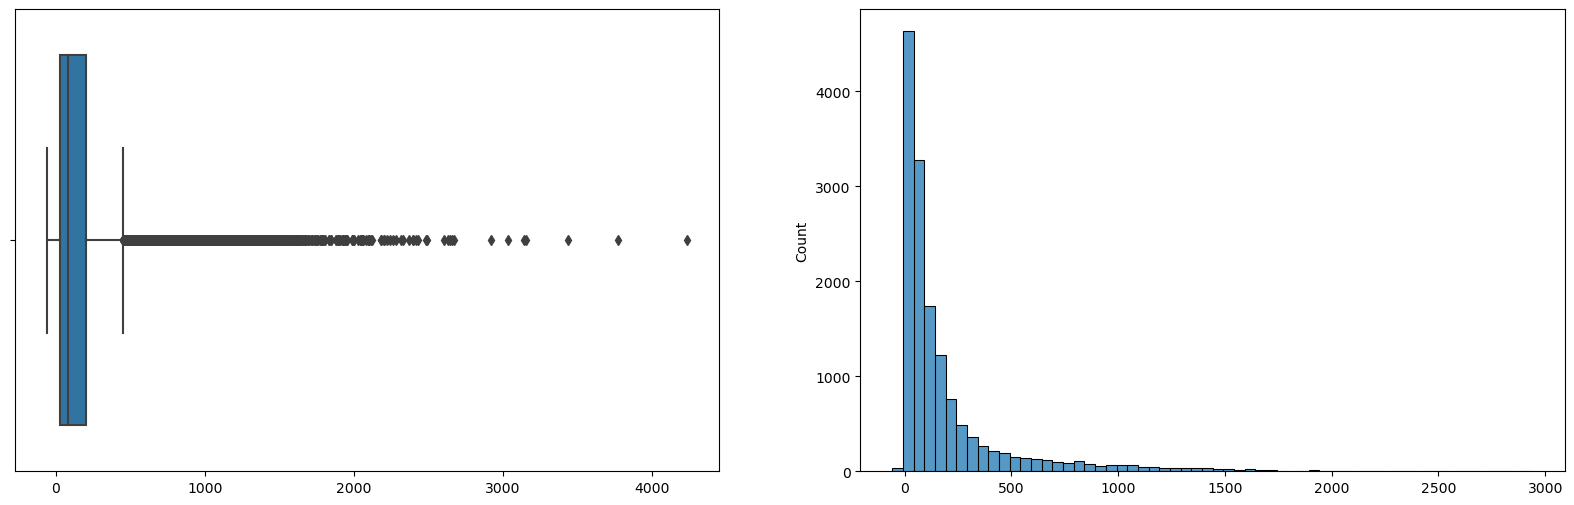

In [46]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=diff_2.values)
plt.subplot(1, 2, 2)
sns.histplot(x=diff_2_filtered.values, binwidth=50)
plt.show()

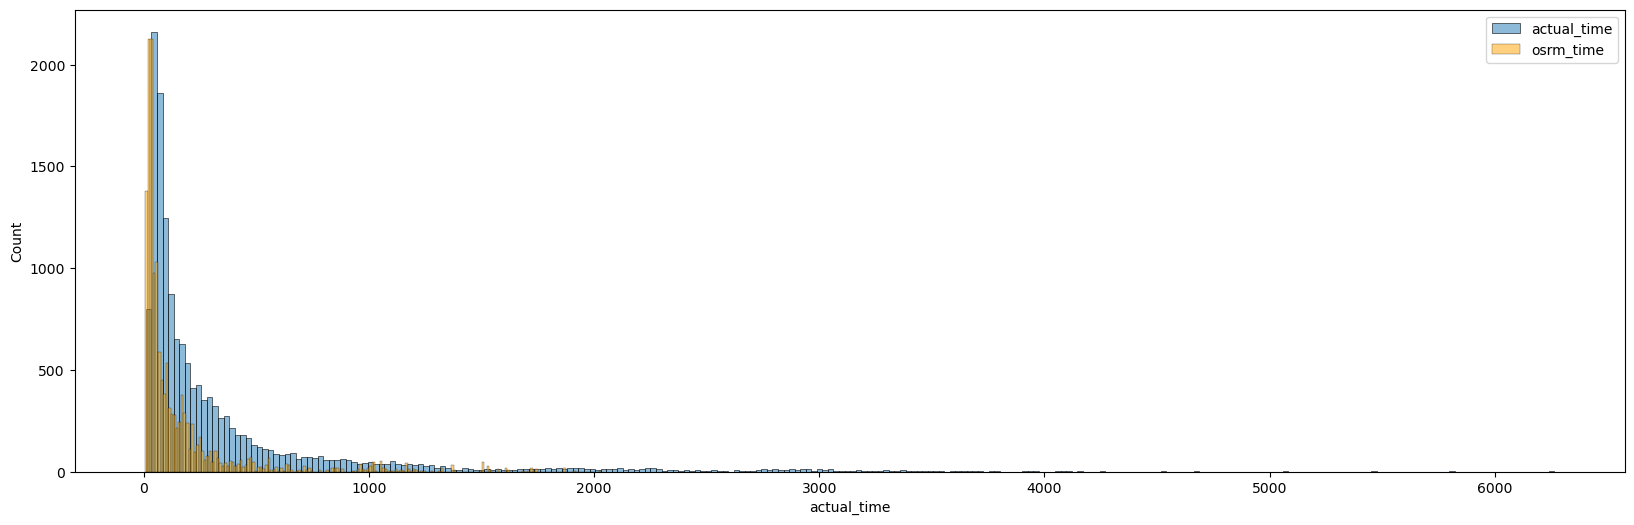

In [47]:
plt.figure(figsize=(20, 6))
sns.histplot(x=df_final['actual_time'], alpha=0.5, label='actual_time')
sns.histplot(x=df_final['osrm_time'], color='orange', alpha=0.5, label='osrm_time')
plt.legend()
plt.show()

**Null and Alternate hypothesis:**
- H0: u_actual_time = u_osrm_time
- Ha: u_actual_time > u_osrm_time

In [48]:
t_stat, p_value=ttest_rel(df_final['actual_time'], df_final['osrm_time'], alternative='greater')
print('p_value:', p_value, 't_stat:', t_stat)
if p_value<0.05:
    print('Reject H0')
else:
    print('Fail to Reject H0')

p_value: 0.0 t_stat: 76.47825181448023
Reject H0


## **Actual Time (Aggregated) vs Segment Actual Time (Aggregated)**

In [49]:
df_final[['actual_time', 'segment_actual_time']]

,actual_time,segment_actual_time
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14773,83.0,82.0
14774,21.0,21.0
14775,282.0,281.0
14776,264.0,258.0


In [50]:
df_final[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14778.000000,14778.000000
mean,357.255312,354.000068
std,562.004628,556.848773
min,9.000000,9.000000
25%,67.000000,66.000000
50%,148.500000,147.000000
75%,369.750000,367.000000
max,6265.000000,6230.000000


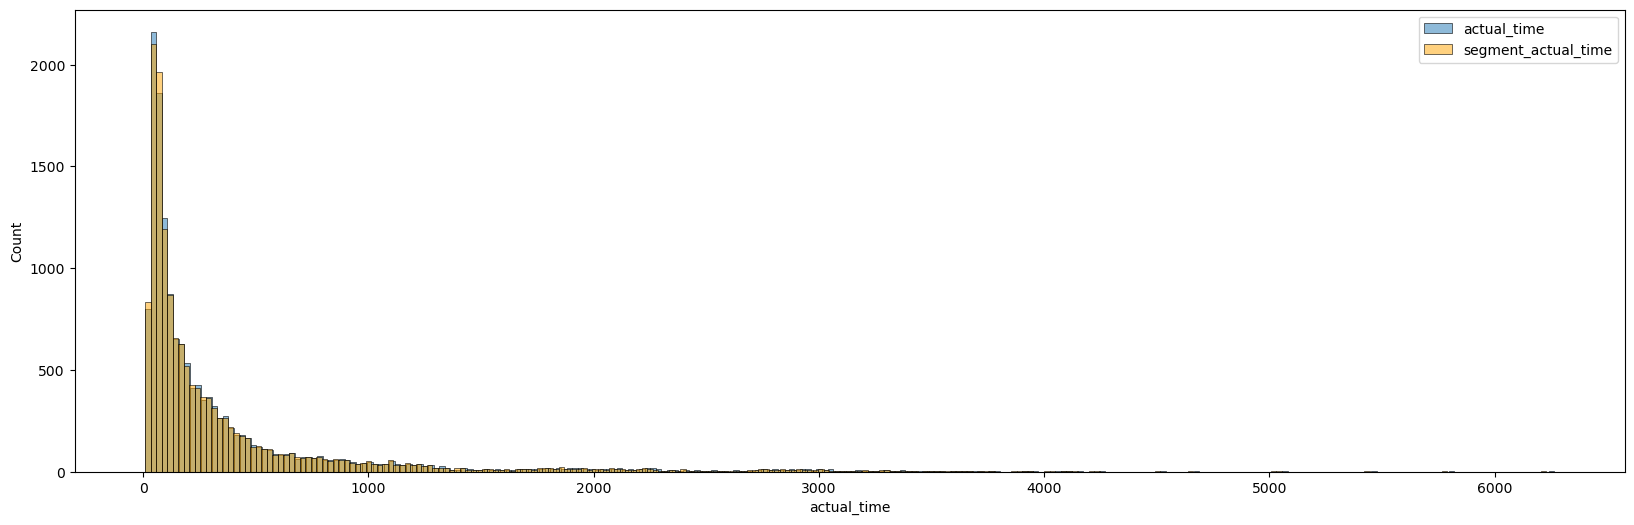

In [51]:
plt.figure(figsize=(20, 6))
sns.histplot(x=df_final['actual_time'], alpha=0.5, label='actual_time')
sns.histplot(x=df_final['segment_actual_time'], color='orange', alpha=0.5, label='segment_actual_time')
plt.legend()
plt.show()

**Null and Alternate hypothesis:**
- H0: u_actual_time = u_segment_actual_time
- Ha: u_actual_time > u_segment_actual_time

In [52]:
t_stat, p_value=ttest_ind(df_final['actual_time'], df_final['segment_actual_time'], equal_var=False, alternative='greater')
print('p_value:', p_value, 't_stat:', t_stat)
if p_value<0.05:
    print('Reject H0')
else:
    print('Fail to Reject H0')

p_value: 0.30847510201695505 t_stat: 0.5001826420167255
Fail to Reject H0


## **OSRM Time (Aggregated) vs Segment OSRM Time (Aggregated)**

In [53]:
df_final[['osrm_time', 'segment_osrm_time']]

,osrm_time,segment_osrm_time
0,717.0,1008.0
1,68.0,65.0
2,1740.0,1941.0
3,15.0,16.0
4,117.0,115.0
...,...,...
14773,62.0,62.0
14774,12.0,11.0
14775,48.0,88.0
14776,179.0,221.0


In [54]:
df_final[['osrm_time', 'segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,14778.000000,14778.000000
mean,161.461700,181.048518
std,271.698104,314.935879
min,6.000000,6.000000
25%,29.000000,30.000000
50%,60.000000,65.000000
75%,168.000000,184.000000
max,2032.000000,2564.000000


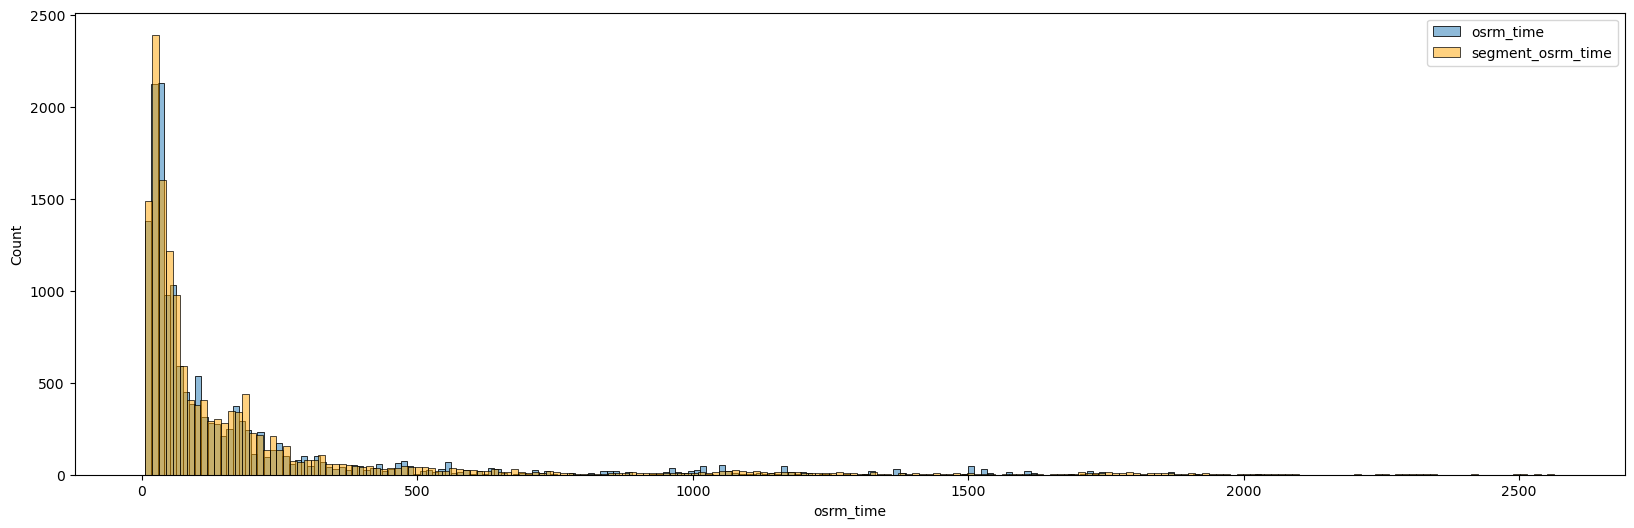

In [55]:
plt.figure(figsize=(20, 6))
sns.histplot(x=df_final['osrm_time'], alpha=0.5, label='osrm_time')
sns.histplot(x=df_final['segment_osrm_time'], color='orange', alpha=0.5, label='segment_osrm_time')
plt.legend()
plt.show()

**Null and Alternate hypothesis:**
- H0: u_osrm_time = u_segment_osrm_time
- Ha: u_osrm_time < u_segment_osrm_time

In [56]:
t_stat, p_value=ttest_ind(df_final['osrm_time'], df_final['segment_osrm_time'], equal_var=False, alternative='less')
print('p_value:', p_value, 't_stat:', t_stat)
if p_value<0.05:
    print('Reject H0')
else:
    print('Fail to Reject H0')

p_value: 5.23595006768526e-09 t_stat: -5.724572572707915
Reject H0


## **OSRM Distance (Aggregated) vs Segment OSRM Distance (Aggregated)**

In [57]:
df_final[['osrm_distance', 'segment_osrm_distance']]

,osrm_distance,segment_osrm_distance
0,991.3523,1320.4733
1,85.1110,84.1894
2,2354.0665,2545.2678
3,19.6800,19.8766
4,146.7918,146.7919
...,...,...
14773,73.4630,64.8551
14774,16.0882,16.0883
14775,58.9037,104.8866
14776,171.1103,223.5324


In [58]:
df_final[['osrm_distance', 'segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,14778.000000,14778.000000
mean,204.468060,223.356999
std,370.856986,417.149848
min,9.072900,9.072900
25%,30.752100,32.541325
50%,65.365100,69.862800
75%,208.199975,218.636000
max,2840.081000,3523.632400


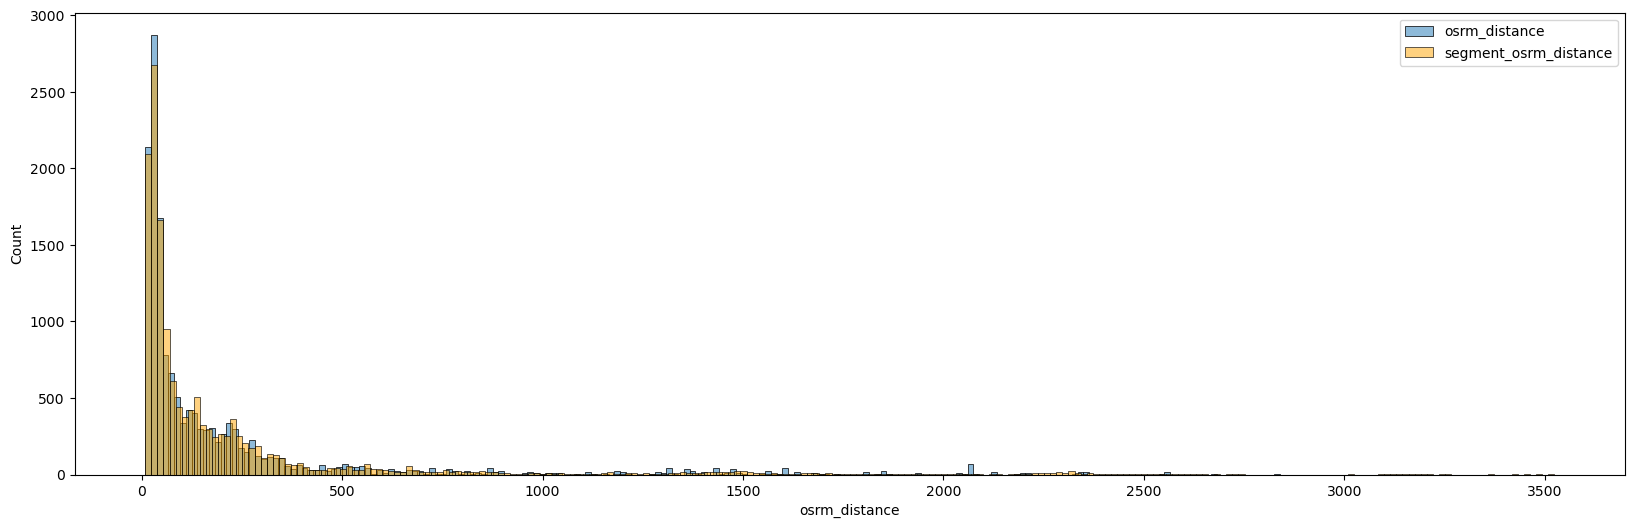

In [59]:
plt.figure(figsize=(20, 6))
sns.histplot(x=df_final['osrm_distance'], alpha=0.5, label='osrm_distance')
sns.histplot(x=df_final['segment_osrm_distance'], color='orange', alpha=0.5, label='segment_osrm_distance')
plt.legend()
plt.show()

**Null and Alternate hypothesis:**
- H0: u_osrm_distance = u_segment_osrm_distance
- Ha: u_osrm_distance < u_segment_osrm_distance

In [60]:
t_stat, p_value=ttest_ind(df_final['osrm_distance'], df_final['segment_osrm_distance'], equal_var=False, alternative='less')
print('p_value:', p_value, 't_stat:', t_stat)
if p_value<0.05:
    print('Reject H0')
else:
    print('Fail to Reject H0')

p_value: 1.950602542129753e-05 t_stat: -4.11388624271749
Reject H0


# **Outliers**

## **Boxplot**
- We just identifying outliers using the boxplot

In [61]:
# df_final.columns

In [62]:
cont_columns = ['stops', 'start_scan_to_end_scan', 'actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time',
                'actual_distance_to_destination', 'osrm_distance','segment_osrm_distance']

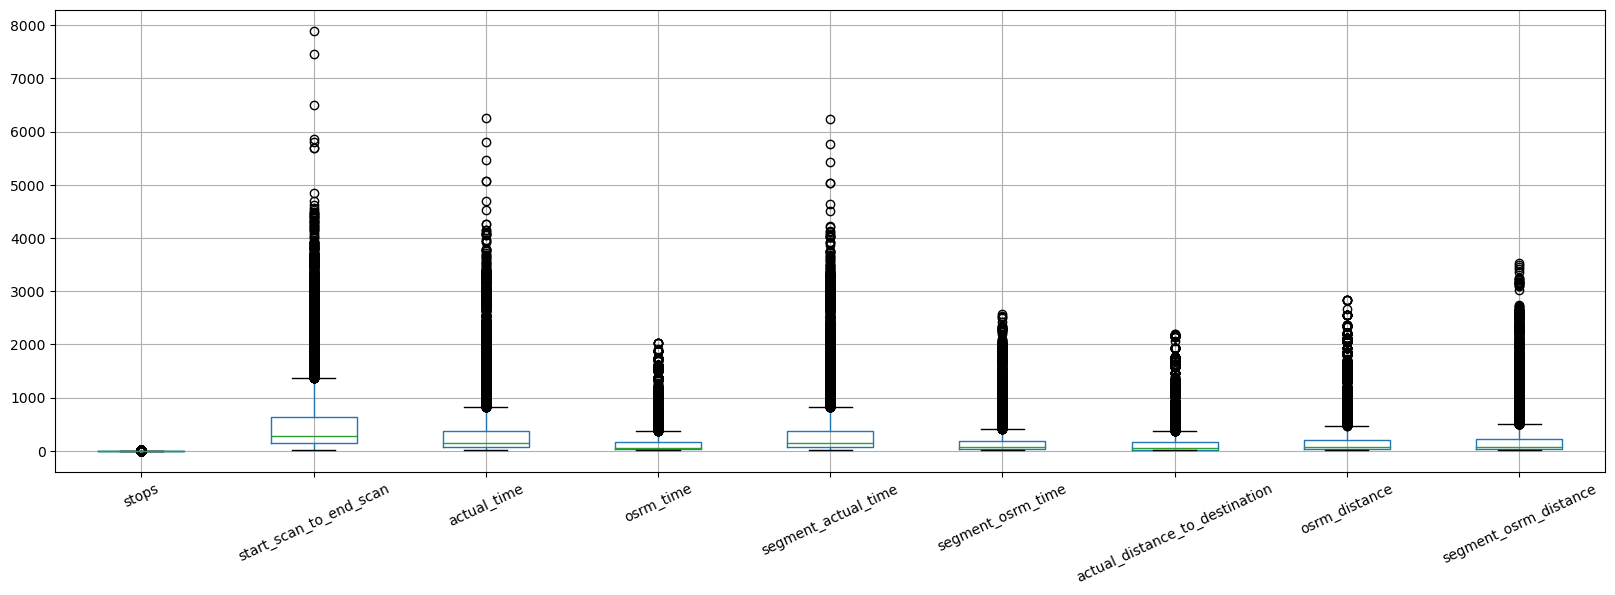

In [63]:
df_final[cont_columns].boxplot(rot=25, figsize=(20,6))
plt.show()

## **Handling outliers**
- We identify the iqr and the upper and lower whiskers using the 1.5*IQR method
- We choose NOT to handle the outliers since we may disturb the true characteristics of the data

In [64]:
for col in cont_columns:
    print(f'Feature: {col}')
    print('-'*50)
    p_25 = np.percentile(df_final[col], 25)
    p_75 = np.percentile(df_final[col], 75)
    iqr = p_75 - p_25
    print('1st_quantile:', p_25)
    print('3rd_quantile:', p_75)
    print('IQR:', iqr)
    print('Lower Whisker:', max(p_25-(1.5*iqr), df_final[col].min()))
    print('Upper Whisker:', min(p_75+(1.5*iqr), df_final[col].max()))
    print('*'*100)

Feature: stops
--------------------------------------------------
1st_quantile: 1.0
3rd_quantile: 2.0
IQR: 1.0
Lower Whisker: 1
Upper Whisker: 3.5
****************************************************************************************************
Feature: start_scan_to_end_scan
--------------------------------------------------
1st_quantile: 149.0
3rd_quantile: 638.0
IQR: 489.0
Lower Whisker: 23.0
Upper Whisker: 1371.5
****************************************************************************************************
Feature: actual_time
--------------------------------------------------
1st_quantile: 67.0
3rd_quantile: 369.75
IQR: 302.75
Lower Whisker: 9.0
Upper Whisker: 823.875
****************************************************************************************************
Feature: osrm_time
--------------------------------------------------
1st_quantile: 29.0
3rd_quantile: 168.0
IQR: 139.0
Lower Whisker: 6.0
Upper Whisker: 376.5
************************************************

# **Encoding for categorical variables**

In [65]:
# df_final.columns

In [66]:
# df_final.info()

In [67]:
cat_cols = ['trip_uuid', 's_state', 's_city', 'd_state', 'd_city', 's_place', 'd_place', 'route_type']

In [68]:
for col in cat_cols:
    print(f'Feature: {col}')
    print('Number of unique values:', df_final[col].nunique())
    print('-'*50)

Feature: trip_uuid
Number of unique values: 14778
--------------------------------------------------
Feature: s_state
Number of unique values: 29
--------------------------------------------------
Feature: s_city
Number of unique values: 670
--------------------------------------------------
Feature: d_state
Number of unique values: 32
--------------------------------------------------
Feature: d_city
Number of unique values: 764
--------------------------------------------------
Feature: s_place
Number of unique values: 687
--------------------------------------------------
Feature: d_place
Number of unique values: 768
--------------------------------------------------
Feature: route_type
Number of unique values: 2
--------------------------------------------------


## **One Hot Encoding**
- Since route_type is only of 2 types, we can perform one hot encoding for this column

In [69]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [70]:
one_hot_enc_transform = enc.fit_transform(df_final[['route_type']]).toarray()
route_type_one_hot_enc = pd.DataFrame(one_hot_enc_transform)
route_type_one_hot_enc

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
14773,1.0,0.0
14774,1.0,0.0
14775,1.0,0.0
14776,1.0,0.0


In [71]:
df_temp = pd.concat([df_final, route_type_one_hot_enc], axis=1)
# df_temp[cat_cols]
df_temp.drop(cat_cols, axis=1, inplace=True)
df_temp.drop(['trip_creation_year', 'trip_creation_month', 'trip_creation_day', 'od_start_time', 'od_end_time'], axis=1, inplace=True)
df_temp.rename(columns={0: 'Carting', 1:'FTL'}, inplace=True)
df_temp

,stops,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance,trip_total_time,Carting,FTL
0,2,2259.0,1562.0,717.0,1548.0,1008.0,824.732854,991.3523,1320.4733,2260.109800,0.0,1.0
1,2,180.0,143.0,68.0,141.0,65.0,73.186911,85.1110,84.1894,181.611874,1.0,0.0
2,2,3933.0,3347.0,1740.0,3308.0,1941.0,1927.404273,2354.0665,2545.2678,3934.362520,0.0,1.0
3,1,100.0,59.0,15.0,59.0,16.0,17.175274,19.6800,19.8766,100.494935,1.0,0.0
4,3,717.0,341.0,117.0,340.0,115.0,127.448500,146.7918,146.7919,718.349042,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14773,2,257.0,83.0,62.0,82.0,62.0,57.762332,73.4630,64.8551,405.485842,1.0,0.0
14774,1,60.0,21.0,12.0,21.0,11.0,15.513784,16.0882,16.0883,60.590521,1.0,0.0
14775,2,421.0,282.0,48.0,281.0,88.0,38.684839,58.9037,104.8866,422.119867,1.0,0.0
14776,5,347.0,264.0,179.0,258.0,221.0,134.723836,171.1103,223.5324,348.512862,1.0,0.0


# **Column Normalization /Column Standardization**

In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [73]:
scaler = StandardScaler()
std_data = scaler.fit_transform(df_temp)
std_data = pd.DataFrame(std_data, columns=df_temp.columns)
std_data.head()

,stops,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance,trip_total_time,Carting,FTL
0,0.187032,2.621618,2.143729,2.044759,2.144281,2.625866,2.159037,2.121871,2.630118,2.559315,-1.231539,1.231539
1,0.187032,-0.532341,-0.381247,-0.344003,-0.382523,-0.368495,-0.298933,-0.321852,-0.333627,-0.546927,0.811992,-0.811992
2,0.187032,5.161169,5.319967,5.810095,5.305031,5.588474,5.765381,5.796496,5.566320,5.061426,-1.231539,1.231539
3,-0.647244,-0.653705,-0.530717,-0.539079,-0.529785,-0.524088,-0.482122,-0.498290,-0.487804,-0.668154,0.811992,-0.811992
4,1.021307,0.282318,-0.028925,-0.163649,-0.025142,-0.209728,-0.121467,-0.155527,-0.183550,0.255208,-1.231539,1.231539


# **EDA**

## **Histogram of continuous variables**

In [74]:
cont_columns

['stops',
 'start_scan_to_end_scan',
 'actual_time',
 'osrm_time',
 'segment_actual_time',
 'segment_osrm_time',
 'actual_distance_to_destination',
 'osrm_distance',
 'segment_osrm_distance']

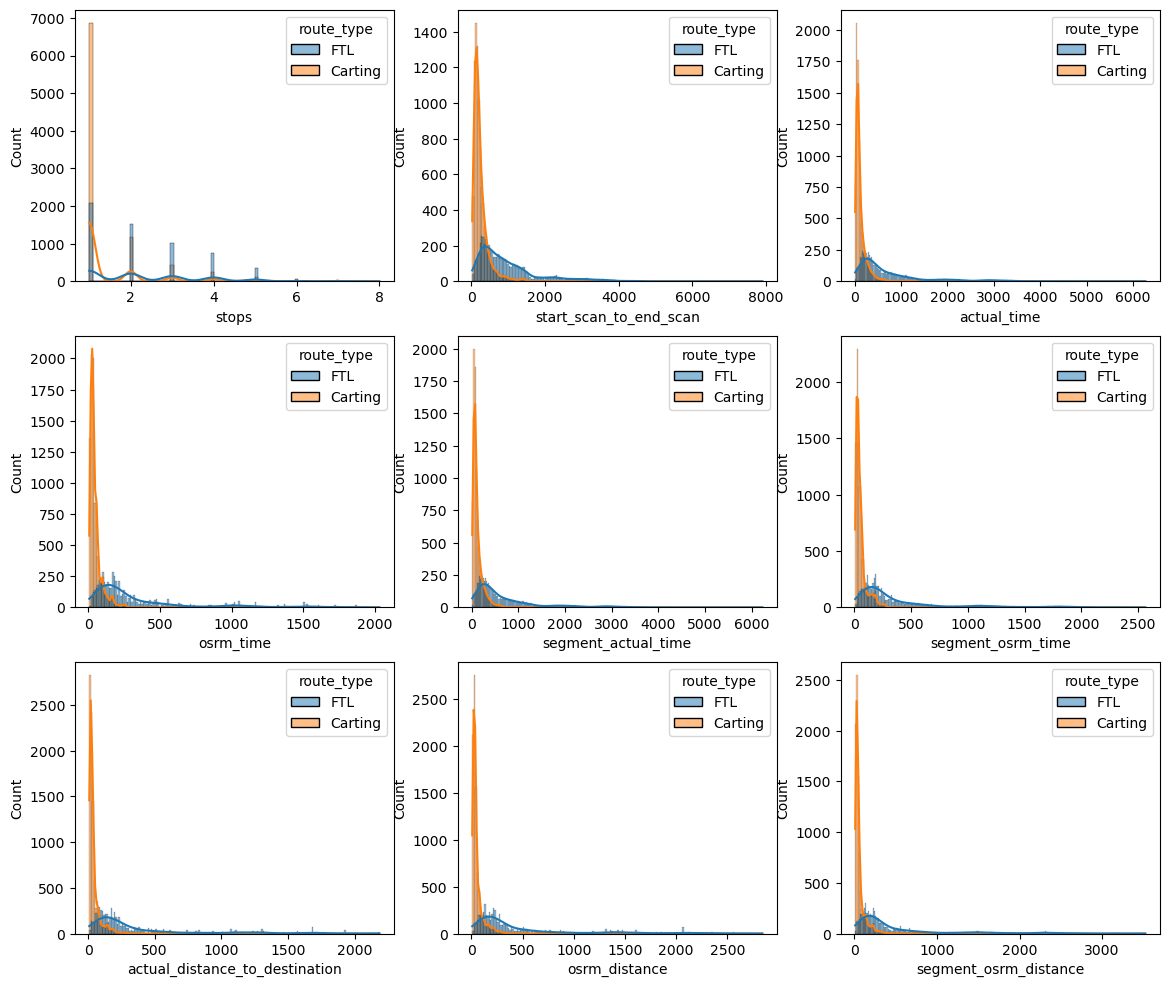

In [75]:
f,ax=plt.subplots(nrows=3,ncols=3, figsize=(14,12))
index=0
for row in range(3):
    for col in range(3):
        sns.histplot(x=df_final[cont_columns[index]],ax=ax[row,col],data=df_final, kde=True, hue='route_type')
        index+=1
plt.show()

**Observation:**
- As per the plot above all numerical variables seem to follow log-normal distribution

## **Trip total time vs Route Type**

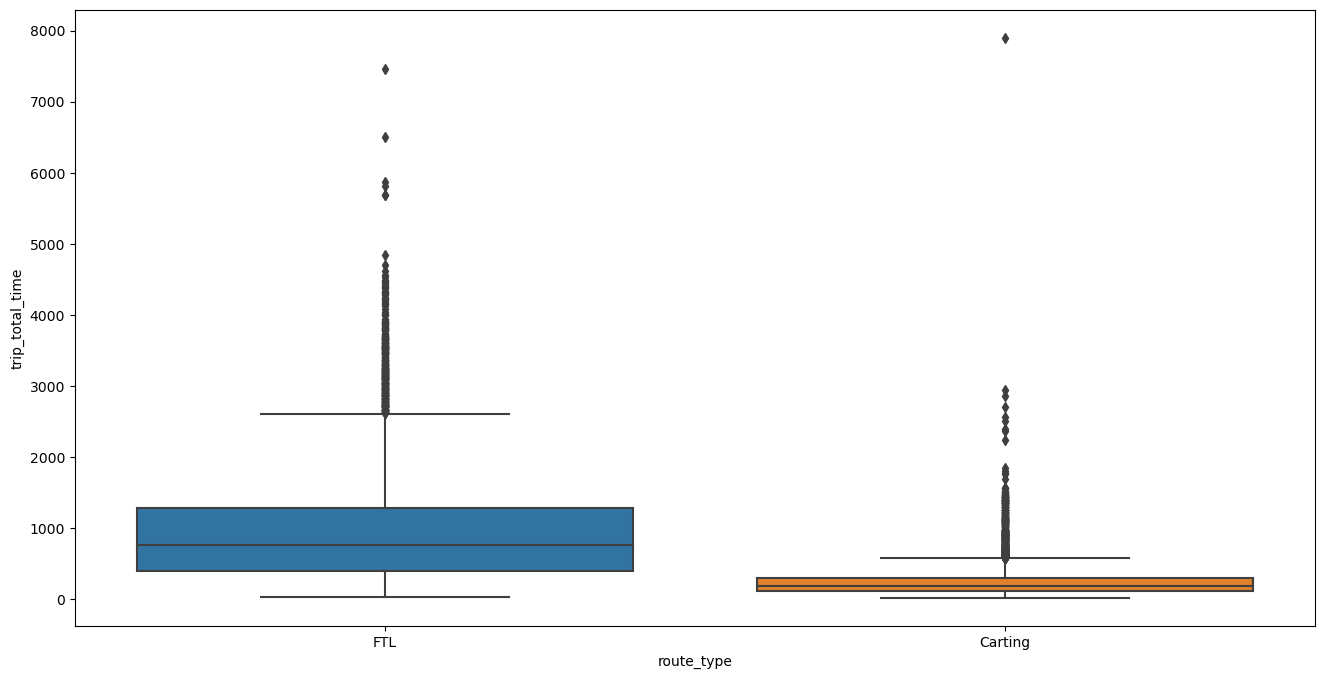

In [76]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='route_type',y='trip_total_time', data=df_final)
plt.show()

**Observation:**
- As per the figure carting takes less time than Full Truck Load

## **Box plot of continuous columns across Route Type**

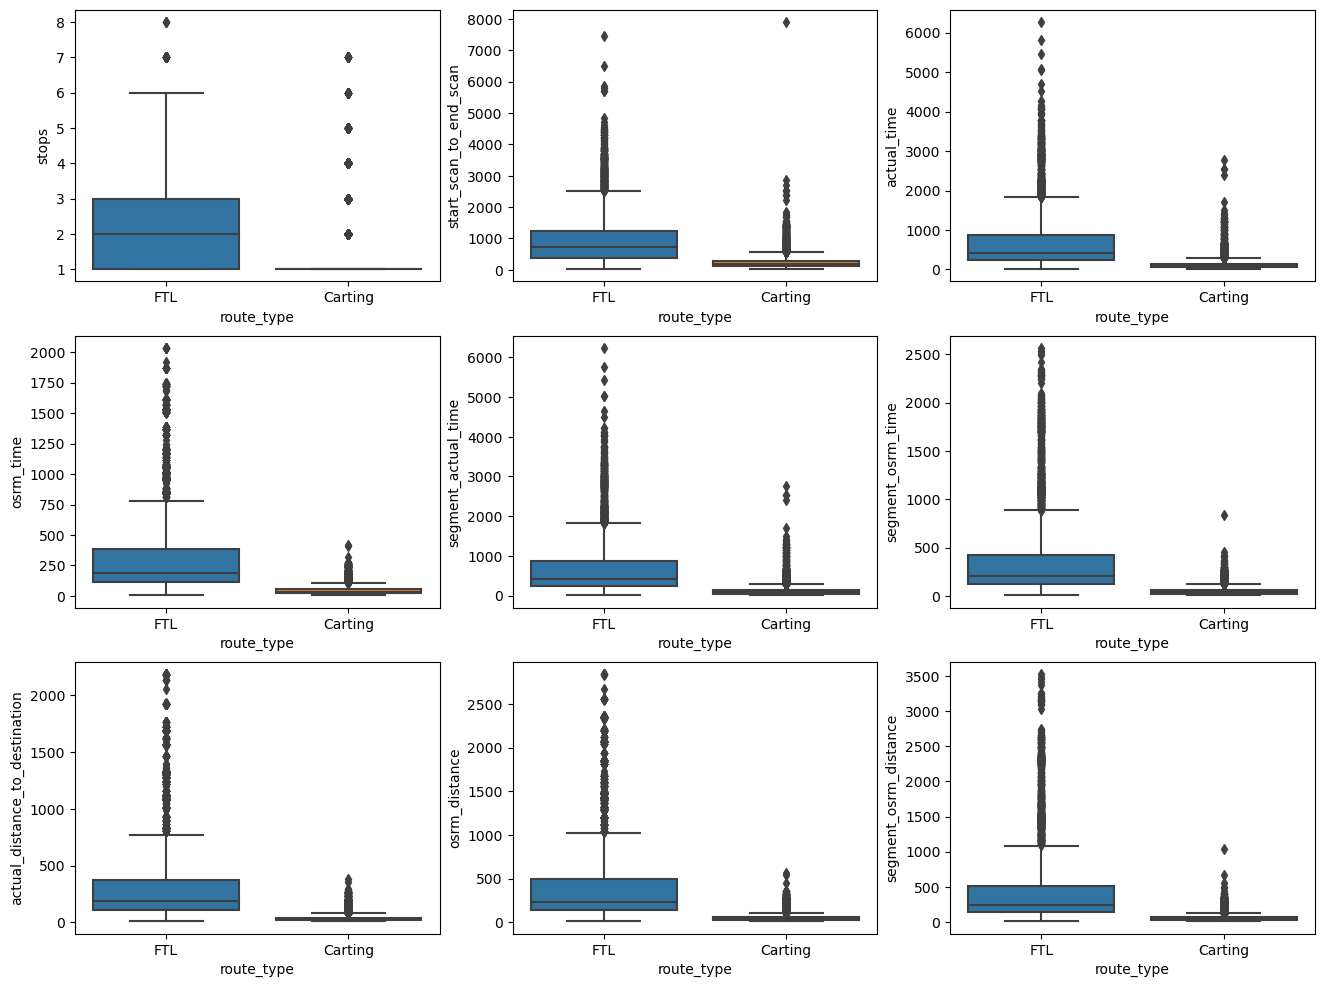

In [77]:
f,axes=plt.subplots(nrows=3,ncols=3, figsize=(16,12))
index=0
for row in range(3):
    for col in range(3):
        sns.boxplot(data=df_final,x='route_type',y=df_final[cont_columns[index]],ax=axes[row,col])
        index+=1
plt.show()

**Observations:**
- As evident from the above plots Carting is used for small distances and Full Truck Load is long distances

## **Actual Tine vs OSRM Distance across Route Type**

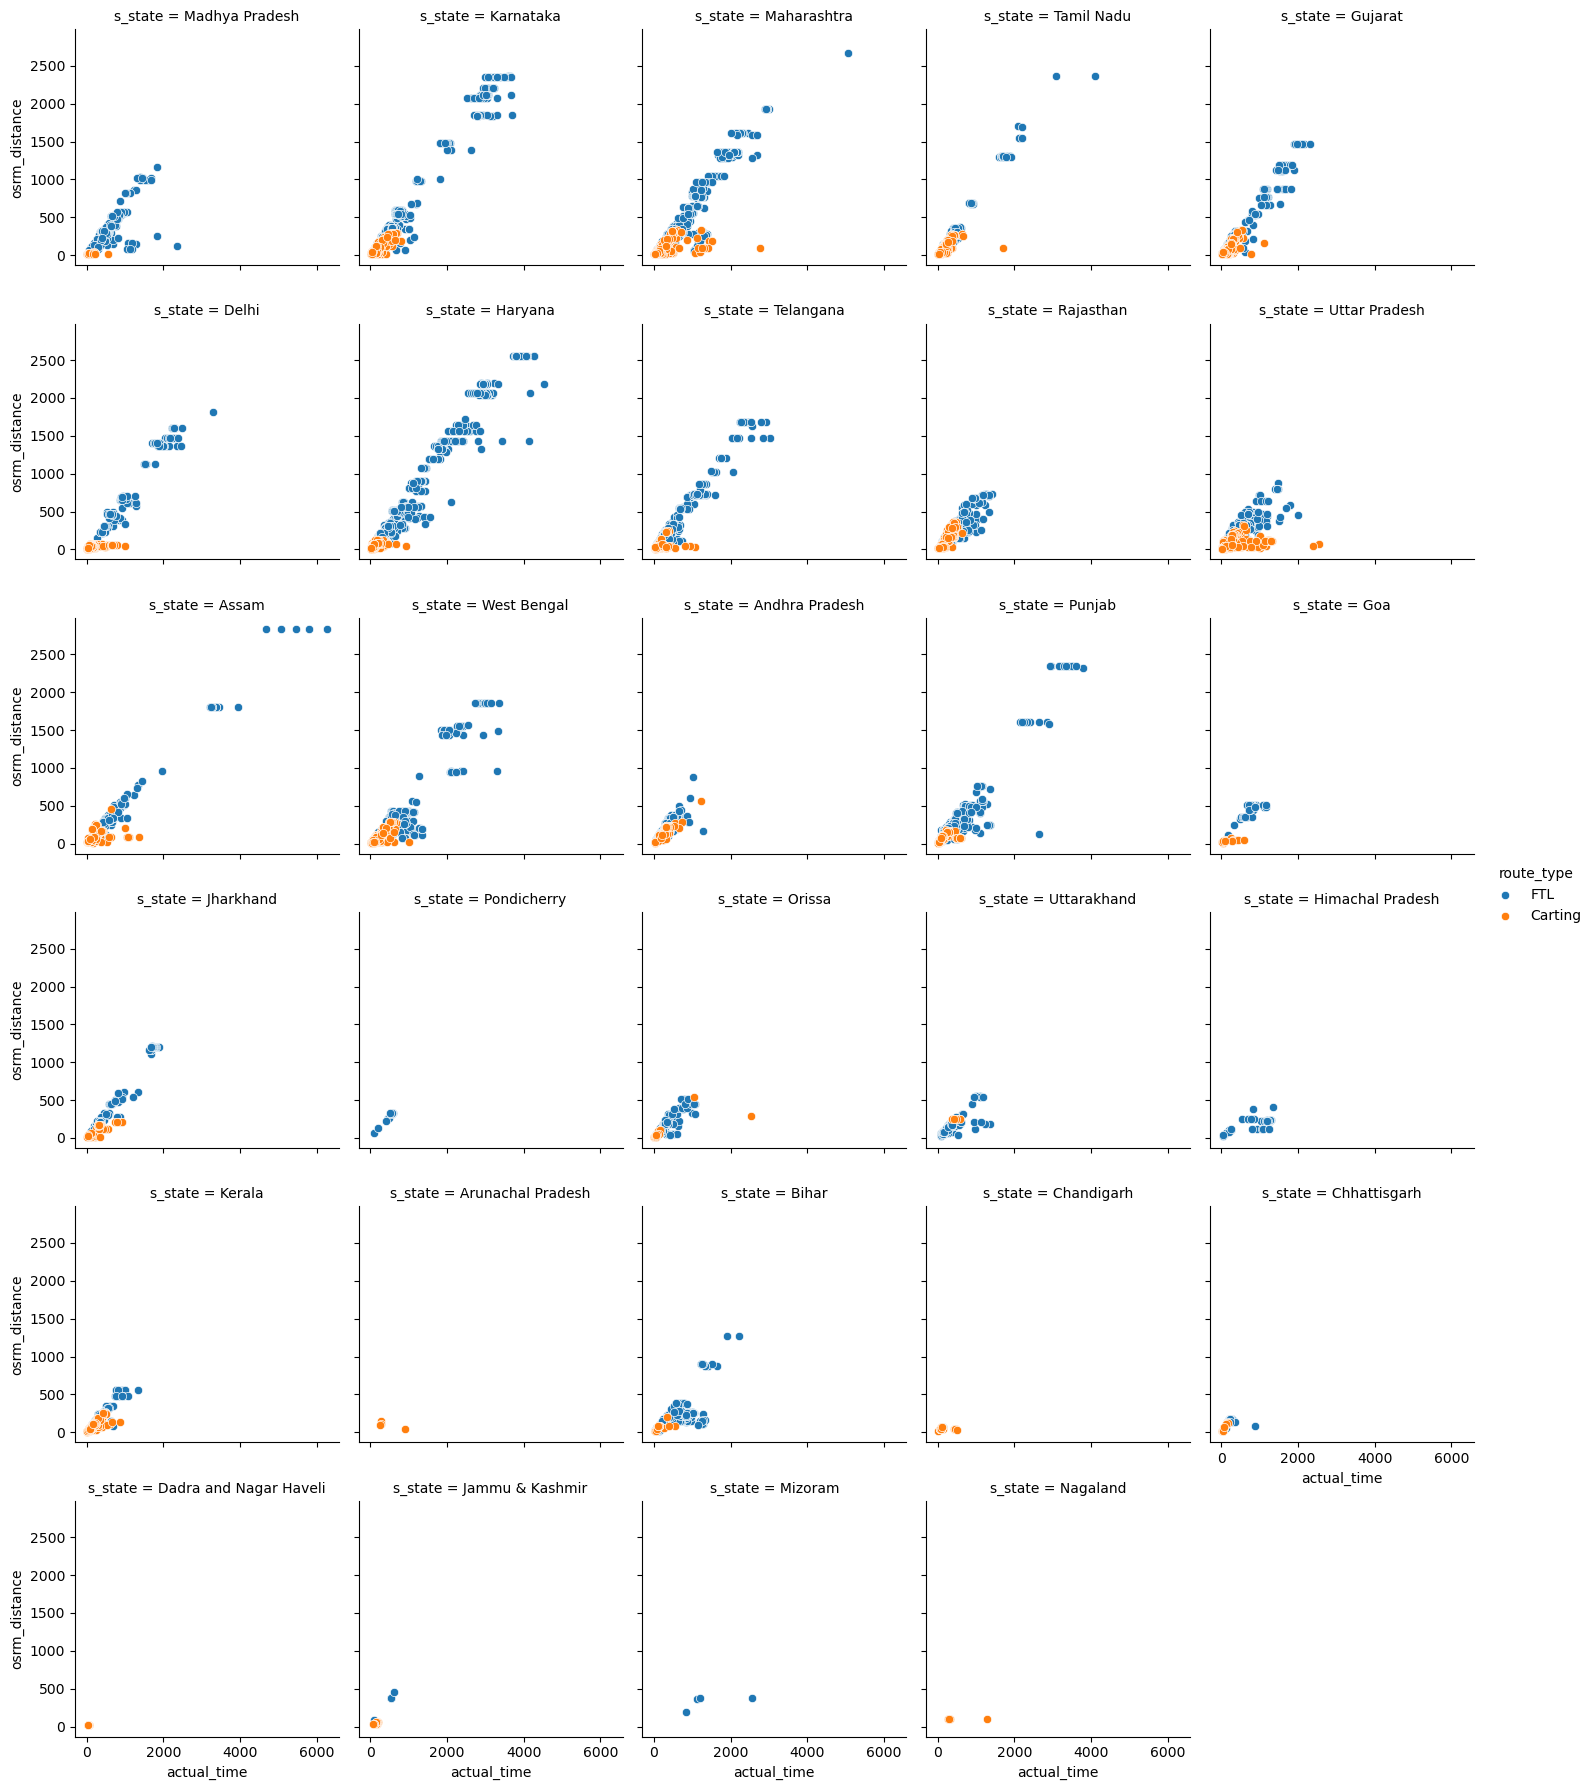

In [78]:
g=sns.FacetGrid(data=df_final, col='s_state',col_wrap=5,hue="route_type")
g.map(sns.scatterplot, "actual_time", "osrm_distance" )
g.add_legend()
plt.show()

**Observations:**
- The actual_time and osrm_distance have linear relationship as expected

## **Temporal aspects**

**Count of Trips per month**

In [79]:
df_final.groupby(['trip_creation_year', 'trip_creation_month'])['trip_uuid'].agg('count')

trip_creation_year  trip_creation_month
2018                9                      13003
                    10                      1775
Name: trip_uuid, dtype: int64

**Count of Trips per day**

In [80]:
df_final.groupby(['trip_creation_year', 'trip_creation_month', 'trip_creation_day'])['trip_uuid'].agg('count')

trip_creation_year  trip_creation_month  trip_creation_day
2018                9                    12                   747
                                         13                   750
                                         14                   712
                                         15                   783
                                         16                   616
                                         17                   722
                                         18                   791
                                         19                   674
                                         20                   703
                                         21                   740
                                         22                   740
                                         23                   631
                                         24                   658
                                         25                   696
                 

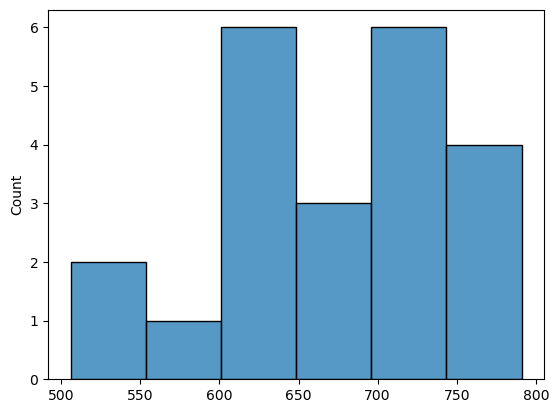

In [81]:
sns.histplot(x=df_final.groupby(['trip_creation_year', 'trip_creation_month', 'trip_creation_day'])['trip_uuid'].agg('count').values)
plt.show()

## **Effect of stops on the actual time taken and actual distance covered per trip**

**Number of stops per trip**

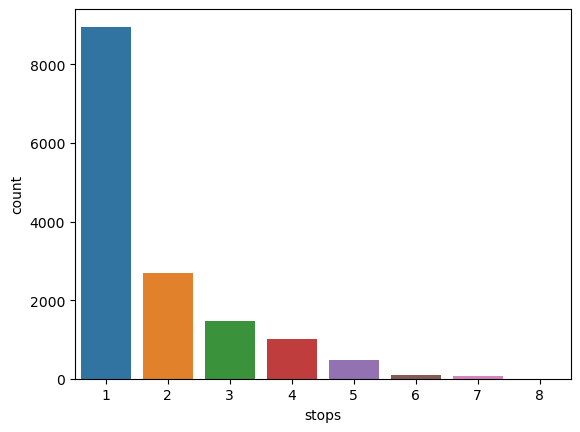

In [82]:
sns.countplot(x=df_final['stops'])
plt.show()

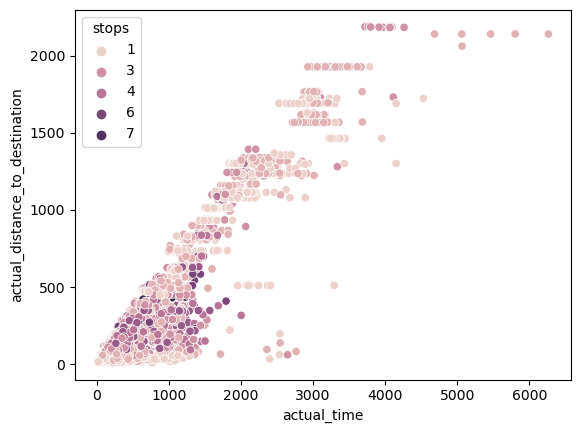

In [83]:
sns.scatterplot(x=df_final['actual_time'], y=df_final['actual_distance_to_destination'], hue=df_final['stops'])
plt.show()

## **Interstate trips**

In [84]:
df_interstate = df_final.loc[df_final['s_state'] != df_final['d_state']].copy()
df_interstate.head()

,trip_uuid,trip_creation_year,trip_creation_month,trip_creation_day,s_state,s_city,d_state,d_city,s_place,d_place,...,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance,trip_total_time
0,trip-153671041653548748,2018,9,12,Madhya Pradesh,Bhopal,Haryana,Gurgaon,Trnsport-H,Bilaspur-HB,...,2018-09-13 13:40:23.123744,2259.0,1562.0,717.0,1548.0,1008.0,824.732854,991.3523,1320.4733,2260.109800
2,trip-153671043369099517,2018,9,12,Karnataka,Bangalore,Punjab,Chandigarh,Nelmngla-H,Mehmdpur-H,...,2018-09-14 17:34:55.442454,3933.0,3347.0,1740.0,3308.0,1941.0,1927.404273,2354.0665,2545.2678,3934.362520
13,trip-153671121411074590,2018,9,12,Telangana,Hyderabad,Karnataka,Bangalore,Shamshbd-H,Nelmngla-H,...,2018-09-12 19:09:57.540819,995.0,809.0,428.0,802.0,492.0,474.446597,542.0812,623.3792,996.217031
17,trip-153671143043841452,2018,9,12,Uttar Pradesh,Allahabad,Madhya Pradesh,Satna,Central-H1,Central-I2,...,2018-09-12 08:51:47.427311,514.0,289.0,132.0,287.0,130.0,129.749996,184.6407,184.8169,514.616477
39,trip-153671320412492075,2018,9,12,Karnataka,Bangalore,Telangana,Hyderabad,Nelmngla-H,Shamshbd-H,...,2018-09-12 16:12:47.729762,916.0,739.0,430.0,732.0,471.0,472.046507,546.2340,596.8154,916.941170


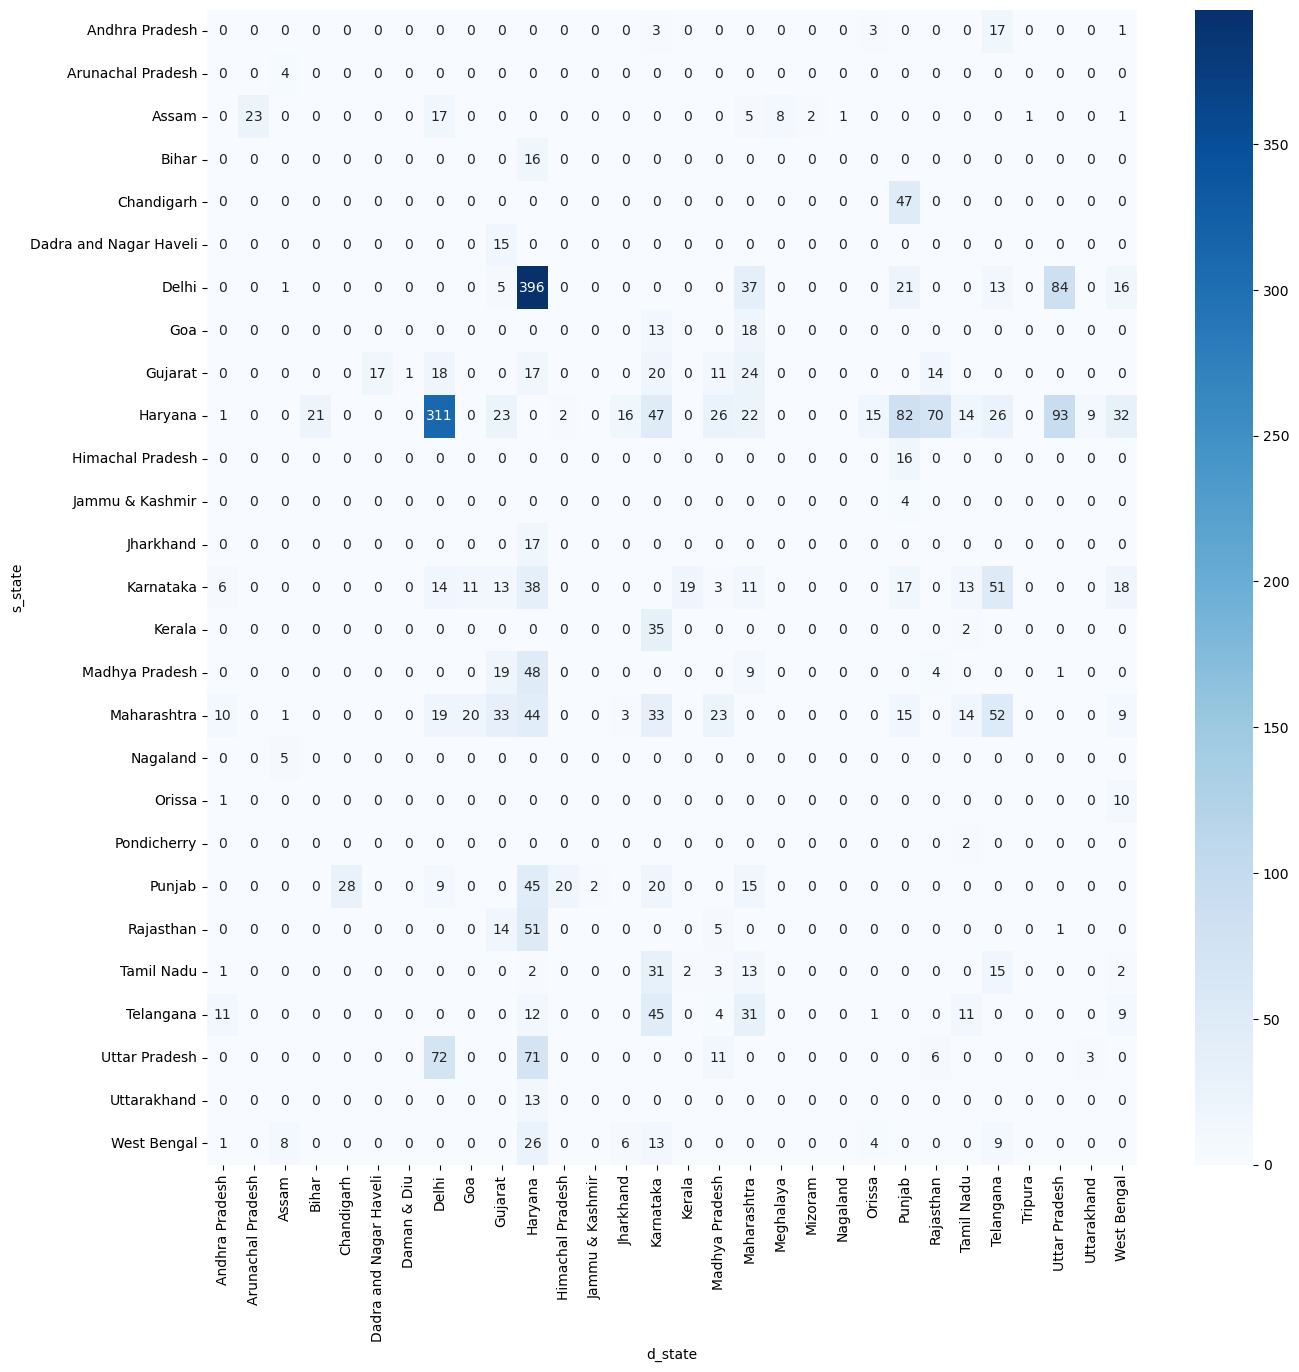

In [85]:
plt.figure(figsize=(15, 15))
sns.heatmap(pd.crosstab(index=df_interstate['s_state'], columns=df_interstate['d_state']), cmap='Blues', annot=True, fmt='.0f')
plt.show()

### **Defining delivery speed of trip**
- trip_delivery_speed = actual_distance/actual_time

In [86]:
df_interstate.head()

,trip_uuid,trip_creation_year,trip_creation_month,trip_creation_day,s_state,s_city,d_state,d_city,s_place,d_place,...,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance,trip_total_time
0,trip-153671041653548748,2018,9,12,Madhya Pradesh,Bhopal,Haryana,Gurgaon,Trnsport-H,Bilaspur-HB,...,2018-09-13 13:40:23.123744,2259.0,1562.0,717.0,1548.0,1008.0,824.732854,991.3523,1320.4733,2260.109800
2,trip-153671043369099517,2018,9,12,Karnataka,Bangalore,Punjab,Chandigarh,Nelmngla-H,Mehmdpur-H,...,2018-09-14 17:34:55.442454,3933.0,3347.0,1740.0,3308.0,1941.0,1927.404273,2354.0665,2545.2678,3934.362520
13,trip-153671121411074590,2018,9,12,Telangana,Hyderabad,Karnataka,Bangalore,Shamshbd-H,Nelmngla-H,...,2018-09-12 19:09:57.540819,995.0,809.0,428.0,802.0,492.0,474.446597,542.0812,623.3792,996.217031
17,trip-153671143043841452,2018,9,12,Uttar Pradesh,Allahabad,Madhya Pradesh,Satna,Central-H1,Central-I2,...,2018-09-12 08:51:47.427311,514.0,289.0,132.0,287.0,130.0,129.749996,184.6407,184.8169,514.616477
39,trip-153671320412492075,2018,9,12,Karnataka,Bangalore,Telangana,Hyderabad,Nelmngla-H,Shamshbd-H,...,2018-09-12 16:12:47.729762,916.0,739.0,430.0,732.0,471.0,472.046507,546.2340,596.8154,916.941170


In [87]:
df_interstate['trip_speed_kmph'] = (df_interstate['actual_distance_to_destination']/df_interstate['trip_total_time'])*60

In [88]:
df_interstate_speed = df_interstate.groupby(['s_state', 'd_state'])['trip_speed_kmph'].agg(['mean', 'count']).reset_index()
df_interstate_speed.sort_values(by='mean', ascending=False, inplace=True)
df_interstate_speed

,s_state,d_state,mean,count
3,Andhra Pradesh,West Bengal,40.550575,1
39,Haryana,Jharkhand,33.255447,16
40,Haryana,Karnataka,32.693659,47
37,Haryana,Gujarat,32.542952,23
50,Haryana,West Bengal,32.468825,32
...,...,...,...,...
51,Himachal Pradesh,Punjab,9.322701,16
90,Punjab,Chandigarh,8.946907,28
10,Assam,Nagaland,8.197893,1
86,Nagaland,Assam,5.390627,5


### **Top-10 Source-Destination States pairs with Fastest Delivery Speed:**

In [89]:
df_interstate_speed.iloc[:10, :-1]

,s_state,d_state,mean
3,Andhra Pradesh,West Bengal,40.550575
39,Haryana,Jharkhand,33.255447
40,Haryana,Karnataka,32.693659
37,Haryana,Gujarat,32.542952
50,Haryana,West Bengal,32.468825
13,Bihar,Haryana,31.972790
125,West Bengal,Haryana,31.944301
78,Maharashtra,Haryana,31.638510
108,Tamil Nadu,West Bengal,31.586047
58,Karnataka,Haryana,31.577576


### **Bottom-10 Source-Destination States pairs with Slowest Delivery Speed:**

In [90]:
df_interstate_speed.sort_values(by='mean', ascending=True).iloc[:10, :-1]

,s_state,d_state,mean
87,Orissa,Andhra Pradesh,1.492312
86,Nagaland,Assam,5.390627
10,Assam,Nagaland,8.197893
90,Punjab,Chandigarh,8.946907
51,Himachal Pradesh,Punjab,9.322701
117,Uttar Pradesh,Delhi,9.803156
27,Gujarat,Daman & Diu,9.892707
122,Uttarakhand,Haryana,10.470766
12,Assam,West Bengal,10.540807
124,West Bengal,Assam,11.139528


## **Intrastate trips**

In [91]:
df_intrastate = df_final.loc[df_final['s_state'] == df_final['d_state']].copy()
df_intrastate.head()

,trip_uuid,trip_creation_year,trip_creation_month,trip_creation_day,s_state,s_city,d_state,d_city,s_place,d_place,...,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance,trip_total_time
1,trip-153671042288605164,2018,9,12,Karnataka,Tumkur,Karnataka,Chikblapur,Veersagr-I,ShntiSgr-D,...,2018-09-12 03:01:59.598855,180.0,143.0,68.0,141.0,65.0,73.186911,85.1110,84.1894,181.611874
3,trip-153671046011330457,2018,9,12,Maharashtra,Mumbai Hub,Maharashtra,Mumbai,NA,MiraRd-IP,...,2018-09-12 01:41:29.809822,100.0,59.0,15.0,59.0,16.0,17.175274,19.6800,19.8766,100.494935
4,trip-153671052974046625,2018,9,12,Karnataka,Bellary,Karnataka,Bellary,DC,DC,...,2018-09-12 12:00:30.683231,717.0,341.0,117.0,340.0,115.0,127.448500,146.7918,146.7919,718.349042
5,trip-153671055416136166,2018,9,12,Tamil Nadu,Chennai,Tamil Nadu,Chennai,Porur-DPC,Sriperumbudur-DC,...,2018-09-12 03:13:03.432532,189.0,61.0,23.0,60.0,23.0,24.597048,28.0647,28.0647,190.487849
6,trip-153671066201138152,2018,9,12,Tamil Nadu,Chennai,Tamil Nadu,Chennai,Chrompet-DPC,Vandalur-DC,...,2018-09-12 01:42:22.349694,98.0,24.0,13.0,24.0,13.0,9.100510,12.0184,12.0184,98.005634


### **Top-10 States with highest intrastate trips**

In [92]:
df_intrastate['s_state'].value_counts()[:10]

Maharashtra      2406
Karnataka        2016
Tamil Nadu       1016
Haryana           871
Telangana         655
Gujarat           624
West Bengal       610
Uttar Pradesh     542
Punjab            491
Rajasthan         422
Name: s_state, dtype: int64

### **Top-10 Source-Destination City Pairs with highest count of trips**

In [93]:
df_intrastate[['s_city', 'd_city']].value_counts()[:20]

s_city      d_city       
Bangalore   Bangalore        1376
Hyderabad   Hyderabad         398
Bhiwandi    Mumbai            332
Mumbai      Mumbai            264
Mumbai Hub  Mumbai            227
Mumbai      Bhiwandi          207
Chennai     Chennai           201
MAA         Chennai           178
Chandigarh  Chandigarh        176
Jaipur      Jaipur            155
Sonipat     Sonipat           150
Delhi       Delhi             149
Kolkata     Kolkata           145
Muzaffrpur  Muzaffrpur        130
Pune        Pune              130
Ahmedabad   Ahmedabad         125
Chennai     MAA               115
Bhiwandi    Bhiwandi          113
            Mumbai Hub        105
Bangalore   HBR Layout PC      96
dtype: int64

### **Defining delivery speed of trip**
- trip_delivery_speed = actual_distance/actual_time

In [94]:
df_intrastate.head()

,trip_uuid,trip_creation_year,trip_creation_month,trip_creation_day,s_state,s_city,d_state,d_city,s_place,d_place,...,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance,trip_total_time
1,trip-153671042288605164,2018,9,12,Karnataka,Tumkur,Karnataka,Chikblapur,Veersagr-I,ShntiSgr-D,...,2018-09-12 03:01:59.598855,180.0,143.0,68.0,141.0,65.0,73.186911,85.1110,84.1894,181.611874
3,trip-153671046011330457,2018,9,12,Maharashtra,Mumbai Hub,Maharashtra,Mumbai,NA,MiraRd-IP,...,2018-09-12 01:41:29.809822,100.0,59.0,15.0,59.0,16.0,17.175274,19.6800,19.8766,100.494935
4,trip-153671052974046625,2018,9,12,Karnataka,Bellary,Karnataka,Bellary,DC,DC,...,2018-09-12 12:00:30.683231,717.0,341.0,117.0,340.0,115.0,127.448500,146.7918,146.7919,718.349042
5,trip-153671055416136166,2018,9,12,Tamil Nadu,Chennai,Tamil Nadu,Chennai,Porur-DPC,Sriperumbudur-DC,...,2018-09-12 03:13:03.432532,189.0,61.0,23.0,60.0,23.0,24.597048,28.0647,28.0647,190.487849
6,trip-153671066201138152,2018,9,12,Tamil Nadu,Chennai,Tamil Nadu,Chennai,Chrompet-DPC,Vandalur-DC,...,2018-09-12 01:42:22.349694,98.0,24.0,13.0,24.0,13.0,9.100510,12.0184,12.0184,98.005634


In [95]:
df_intrastate['trip_speed_kmph'] = (df_intrastate['actual_distance_to_destination']/df_intrastate['trip_total_time'])*60

In [96]:
df_intrastate_speed = df_interstate.groupby('s_state')['trip_speed_kmph'].agg(['mean', 'count']).reset_index()
df_intrastate_speed.sort_values(by='mean', ascending=False, inplace=True)
df_intrastate_speed

,s_state,mean,count
3,Bihar,31.972790,16
12,Jharkhand,29.625398,17
16,Maharashtra,27.553644,276
26,West Bengal,27.216028,67
11,Jammu & Kashmir,27.005957,4
15,Madhya Pradesh,26.345403,81
23,Telangana,25.950325,124
13,Karnataka,25.883637,214
22,Tamil Nadu,25.322107,69
0,Andhra Pradesh,24.162380,24


### **Top-5 states where the intrastate delivery speed is highest**

In [97]:
df_intrastate_speed.iloc[:5, :-1]

,s_state,mean
3,Bihar,31.972790
12,Jharkhand,29.625398
16,Maharashtra,27.553644
26,West Bengal,27.216028
11,Jammu & Kashmir,27.005957


### **Bottom-5 states where the intrastate delivery speed is lowest**

In [98]:
df_intrastate_speed.iloc[-5:, :-1]

,s_state,mean
5,Dadra and Nagar Haveli,12.398680
4,Chandigarh,11.949038
25,Uttarakhand,10.470766
10,Himachal Pradesh,9.322701
17,Nagaland,5.390627


## **Pairplot**

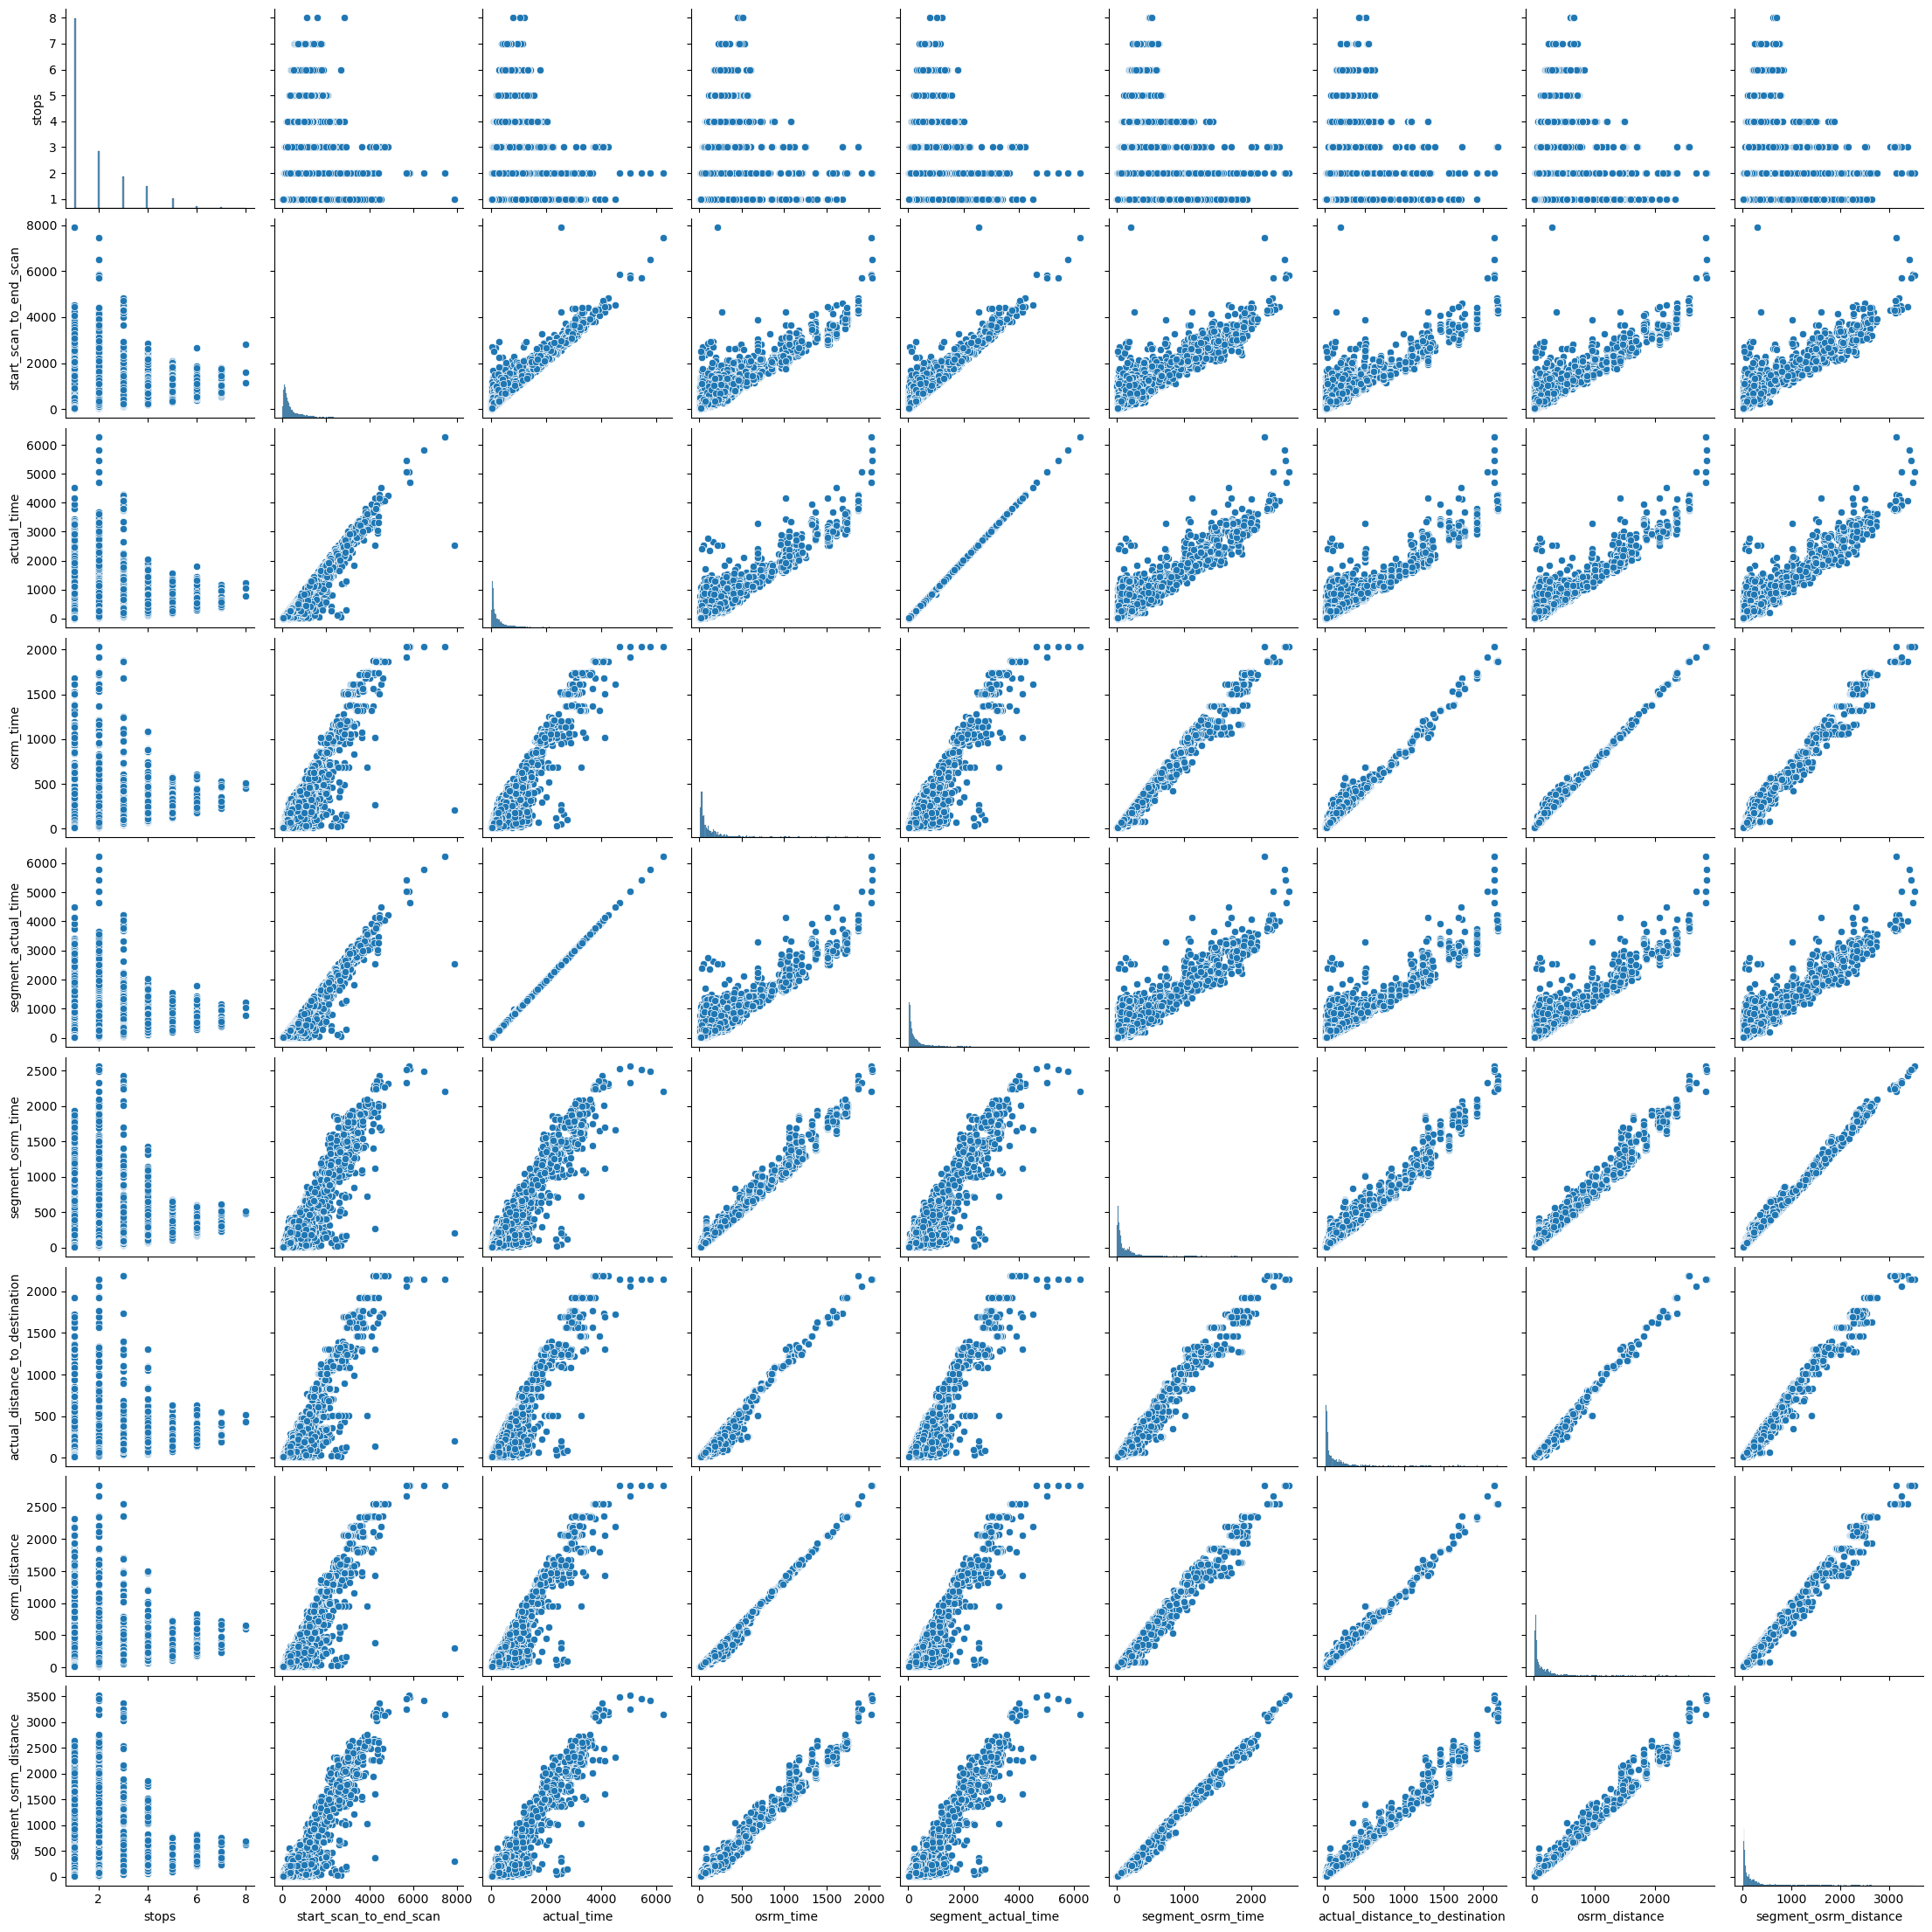

In [99]:
sns.pairplot(data=df_final[cont_columns])
plt.show()

## **Heatmap**

In [100]:
df_temp.drop(['stops', 'Carting', 'FTL'], axis=1).corr()

,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance,trip_total_time
start_scan_to_end_scan,1.000000,0.961229,0.927085,0.961251,0.919047,0.918833,0.924825,0.919801,0.993612
actual_time,0.961229,1.000000,0.958806,0.999989,0.954062,0.953972,0.959431,0.957168,0.952647
osrm_time,0.927085,0.958806,1.000000,0.957982,0.993263,0.993564,0.997582,0.991615,0.916555
segment_actual_time,0.961251,0.999989,0.957982,1.000000,0.953232,0.953040,0.958574,0.956311,0.952721
segment_osrm_time,0.919047,0.954062,0.993263,0.953232,1.000000,0.987542,0.991800,0.996094,0.908076
actual_distance_to_destination,0.918833,0.953972,0.993564,0.953040,0.987542,1.000000,0.997266,0.993065,0.907312
osrm_distance,0.924825,0.959431,0.997582,0.958574,0.991800,0.997266,1.000000,0.994713,0.913705
segment_osrm_distance,0.919801,0.957168,0.991615,0.956311,0.996094,0.993065,0.994713,1.000000,0.908158
trip_total_time,0.993612,0.952647,0.916555,0.952721,0.908076,0.907312,0.913705,0.908158,1.000000


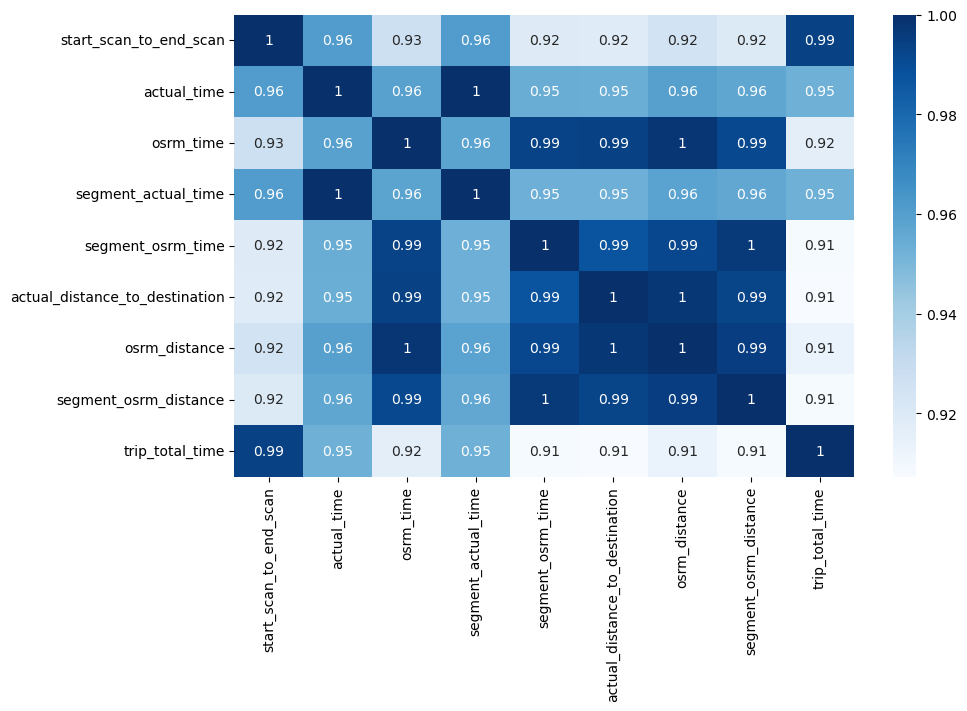

In [101]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_temp.drop(['stops', 'Carting', 'FTL'], axis=1).corr(), cmap='Blues', annot=True)
plt.show()